# MKT Cycle ML Prediction

In [752]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pickle
%run fmml
%run fmplot

In [17]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Import ML Data Frame

In [89]:
# %run finmktml
# Read ML data Frame

filename='./data/df_ml_2020115_195013_to_2020114.csv'
filename = './data/df_ml_2022519_195013_to_2022519.csv'
filename = './data/df_ml_2022520_195013_to_2022520.csv'
filename ='./data/df_ml_2022526_195013_to_2022526.csv'
filename = './data/df_ml_2022527_195013_to_2022527.csv'
dfMLXY = pd.read_csv(filename,index_col=0,parse_dates=True)
print(dfMLXY.shape)


dfMLXY.drop('T10Y3M',axis=1,inplace=True)  # data starts at 1982-1-1


print(dfMLXY.columns.values)
display(dfMLXY.head(3))

display(dfMLXY.tail(3))

(18556, 67)
['Month' 'Close' 'High' 'Low' 'Open' 'Volume' 'mkt' 'mcupm' 'mcnr'
 'mucdown' 'mdcup' 'PE' 'PE_mom' 'Earnings' 'Earnings_mom' 'FEDFUNDSRATE'
 'GDP' 'gdp_qoq' 'recession1q' 'recession2q' 'UNRATE' 'unrate_pchange'
 'CPIAUCSL' 'cpimom' 'UMCSENT' 'umcsent_pchange' 'Close_nma1'
 'Volume_nma1' 'Close_nma5' 'Volume_nma5' 'Close_nma10' 'Volume_nma10'
 'Close_nma15' 'Volume_nma15' 'Close_nma20' 'Volume_nma20' 'Close_nma30'
 'Volume_nma30' 'Close_nma50' 'Volume_nma50' 'Close_nma200'
 'Volume_nma200' 'rma_sma50_sma200' 'rma_sma20_sma50' 'PDI50' 'NDI50'
 'ADX' 'Close_lrstd25' 'Close_lrstd63' 'Close_lrstd126'
 'Close_lrstd25_avgvel5' 'Close_lrstd63_avgvel5' 'Close_lrstd126_avgvel5'
 'Week' 'Day' 'Dayofweek' 'Dayofyear' 'Quarter' 'q_first_date'
 'q_last_date' 'daysfrom_q_start' 'daysto_q_end' 'year_end_date'
 'daysto_year_end' 'year_start_date' 'daysfrom_year_start']


,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1950-01-03,1,16.66,16.66,16.66,16.66,1260000.0,1.0,1.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,1,3,1,1950-01-01,1950-03-31,2,87,1950-12-31,362,1950-01-01,2
1950-01-04,1,16.85,16.85,16.85,16.85,1890000.0,1.0,1.0,0.011405,0.0,0.0,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,0.011405,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.921569,0.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,1,4,2,4,1,1950-01-01,1950-03-31,3,86,1950-12-31,361,1950-01-01,3
1950-01-05,1,16.93,16.93,16.93,16.93,2550000.0,1.0,1.0,0.016206,0.0,0.0,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,0.004748,0.349206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.544858,0.0,71.872483,NaN,NaN,NaN,NaN,NaN,NaN,1,5,3,5,1,1950-01-01,1950-03-31,4,85,1950-12-31,360,1950-01-01,4


,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-05-25,5,3978.729980,3999.330078,3925.030029,3929.590088,4.322190e+09,1.0,1.0,0.778283,0.170503,0.0,23.16,-0.103368,196.28065,0.119088,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,0.009451,0.107788,0.002839,0.010328,0.001260,0.002651,-0.004984,0.008902,-0.003534,0.011036,-0.003118,0.010974,-0.001937,0.009715,-0.000476,0.012359,-0.040497,-0.057144,16.889216,29.529403,22.719325,0.020439,0.016272,0.014155,0.000034,-0.000060,-0.000044,21,25,2,145,2,2022-04-01,2022-06-30,54,36,2022-12-31,220,2022-01-01,144
2022-05-26,5,4057.840088,4075.139893,3984.600098,3984.600098,3.961940e+09,1.0,1.0,0.813641,0.154010,0.0,23.16,-0.103368,196.28065,0.119088,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,0.019883,-0.083349,0.007983,0.003449,0.003378,-0.011682,-0.001282,0.003953,-0.000725,0.007195,-0.002455,0.008195,-0.001772,-0.003966,-0.000420,0.011772,-0.041860,-0.056223,19.288151,28.382092,22.003357,0.020321,0.016386,0.014260,0.000015,-0.000032,0.000002,21,26,3,146,2,2022-04-01,2022-06-30,55,35,2022-12-31,219,2022-01-01,145
2022-05-27,5,4158.240234,4158.490234,4077.429932,4077.429932,3.560560e+09,1.0,1.0,0.858515,0.133079,0.0,23.16,-0.103368,196.28065,0.119088,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,0.024742,-0.101309,0.012902,0.040628,0.003465,-0.005271,0.000745,-0.003701,0.000512,0.002130,-0.001624,0.005968,-0.001269,0.002151,-0.000303,0.011143,-0.042867,-0.054575,21.861338,27.232405,20.956536,0.020955,0.016517,0.014395,0.000141,0.000023,0.000041,21,27,4,147,2,2022-04-01,2022-06-30,56,34,2022-12-31,218,2022-01-01,146


# Current Market High and Bear Price

In [91]:
s = dt.datetime(2021,1,1)
e = dt.datetime(2021,12,31)

mkt_high_2021=dfMLXY.loc[s:e]['Close'].max()
print(f'2021 market high = {mkt_high_2021}')

s = dt.datetime(2022,1,1)
e = dt.datetime(2022,12,31)
mkt_high_2022=dfMLXY.loc[s:e]['Close'].max()
bear_price = 0.8 * mkt_high_2022
print(f'2022 market high = {mkt_high_2022}, bear price = {bear_price }')


2021 market high = 4793.06005859375
2022 market high = 4796.56005859375, bear price = 3837.248046875


# ML Data Pre Processing
* Check Nulls
* Align variables - align according to max correlation strength to the target variable
* Dimensionality Reduction - remove variables with low ML importance ... pre-standardized variables at this point are usefulf for study, observation, and explainability
* Feature Standardardization - Sk Learn Standard Scaler ... only scale non standardized features

### check Nulls

In [742]:
%run fmml

# UMCSENT starts in 1953 2 -1 ... set the start date to 1955-1-1
# GDP starts 1950
# Yield Curve Starts in 1982,1,4
# UNRATE starts in 1950
# CPI start in 1950

dataStartDate=dt.datetime(1955,1,1)
dfMLXY=dfMLXY.loc[dataStartDate:]

print('dfMLXY.shape =',dfMLXY.shape)
nullrows=len([True for idx,row in dfMLXY.iterrows() if any(row.isnull())])
print("null_rows = ",nullrows)

display(dfMLXY[dfMLXY.isna().any(axis=1)])

dfMLXY.shape = (17284, 66)
null_rows =  0


,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### dfX and dfY

In [746]:
print(dfMLXY.columns)

# Y Dataframe
dfY=pd.DataFrame(dfMLXY['mkt'])
dfY.rename(columns={'mkt':'y'},inplace=True)
dfY['y']=(dfY['y']+1)/2
print(dfY.shape)


# X Dataframe
drop_cols = ['Close','High','Low','Open','Volume','mkt','mcnr','Earnings','GDP',
             'q_first_date','q_last_date','year_end_date','year_start_date','Dayofyear'
            ]

dfX = dfMLXY.drop(drop_cols,axis=1).copy()

x_columns=dfX.columns
#  .... these seem to make the performance worse for now, try after PCA
dfX.head()

Index(['Month', 'Close', 'High', 'Low', 'Open', 'Volume', 'mkt', 'mcupm',
       'mcnr', 'mucdown', 'mdcup', 'PE', 'PE_mom', 'Earnings', 'Earnings_mom',
       'FEDFUNDSRATE', 'GDP', 'gdp_qoq', 'recession1q', 'recession2q',
       'UNRATE', 'unrate_pchange', 'CPIAUCSL', 'cpimom', 'UMCSENT',
       'umcsent_pchange', 'Close_nma1', 'Volume_nma1', 'Close_nma5',
       'Volume_nma5', 'Close_nma10', 'Volume_nma10', 'Close_nma15',
       'Volume_nma15', 'Close_nma20', 'Volume_nma20', 'Close_nma30',
       'Volume_nma30', 'Close_nma50', 'Volume_nma50', 'Close_nma200',
       'Volume_nma200', 'rma_sma50_sma200', 'rma_sma20_sma50', 'PDI50',
       'NDI50', 'ADX', 'Close_lrstd25', 'Close_lrstd63', 'Close_lrstd126',
       'Close_lrstd25_avgvel5', 'Close_lrstd63_avgvel5',
       'Close_lrstd126_avgvel5', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Quarter', 'q_first_date', 'q_last_date', 'daysfrom_q_start',
       'daysto_q_end', 'year_end_date', 'daysto_year_end', 'year_start_date',
       

,Month,mcupm,mucdown,mdcup,PE,PE_mom,Earnings_mom,FEDFUNDSRATE,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Quarter,daysfrom_q_start,daysto_q_end,daysto_year_end,daysfrom_year_start
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1955-01-01,1,1.0,0.000000,0.0,12.62,0.027687,0.040398,1.39,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,0.000000,0.000000,0.005146,0.064545,0.000196,0.010341,0.002737,0.018979,0.002157,0.008030,0.002478,0.010950,0.002270,0.021969,0.001496,0.015769,0.103580,0.035326,67.846367,32.153633,31.135684,0.008795,0.007370,0.006617,-0.000031,0.000007,-0.000019,52,1,5,1,0,89,364,0
1955-01-03,1,1.0,0.000000,0.0,12.62,0.027687,0.040398,1.39,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,0.021401,0.190104,0.007373,0.056102,0.003978,0.028279,0.004105,0.041909,0.002835,0.015293,0.003181,0.021064,0.002723,0.026275,0.001638,0.015664,0.104760,0.035439,72.144500,27.855500,31.651500,0.009610,0.007754,0.006846,0.000103,0.000068,0.000019,1,3,0,1,2,87,362,2
1955-01-04,1,1.0,0.008980,0.0,12.62,0.027687,0.040398,1.39,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,-0.008980,-0.032823,0.003827,0.007461,0.002939,0.028711,0.003969,0.042145,0.002156,0.015419,0.002752,0.021354,0.002543,0.027688,0.001618,0.016142,0.105758,0.035034,68.084748,31.915252,31.828676,0.009625,0.007867,0.006910,0.000089,0.000081,0.000035,1,4,1,1,3,86,361,3
1955-01-05,1,1.0,0.033469,0.0,12.62,0.027687,0.040398,1.39,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,-0.024712,0.049774,-0.001115,0.055339,0.000581,0.038371,0.001914,0.043199,0.001007,0.013589,0.001482,0.015347,0.002155,0.026183,0.001504,0.016864,0.106433,0.033844,58.707247,41.292753,31.263414,0.010936,0.008552,0.007288,0.000406,0.000229,0.000111,1,5,2,1,4,85,360,4
1955-01-06,1,1.0,0.046531,0.0,12.62,0.027687,0.040398,1.39,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,-0.013513,0.142241,-0.005161,0.069859,-0.000856,0.056930,0.000300,0.036867,0.000575,0.030942,0.000845,0.017378,0.001897,0.031849,0.001410,0.018070,0.106921,0.032485,54.537539,45.462461,30.393284,0.011324,0.008746,0.007407,0.000479,0.000275,0.000147,1,6,3,1,5,84,359,5


(17284, 1)

mucdown raw (unstandardized) min, max  = 0.0, 0.3323633240965542

standardized mucdown min, max  = -0.8728129249487532,7.113116011331106

(17284, 52)
1 ['FEDFUNDSRATE', 'mcupm', 'mucdown', 'mdcup', 'CPIAUCSL', 'cpimom', 'UMCSENT', 'umcsent_pchange', 'UNRATE', 'unrate_pchange', 'recession1q', 'recession2q', 'PE', 'PE_mom', 'gdp_qoq', 'Close_nma1', 'Volume_nma1', 'Week', 'Dayofweek', 'Quarter', 'daysfrom_q_start', 'Day', 'Dayofweek', 'daysfrom_year_start', 'daysto_q_end', 'daysto_year_end']
3 ['Close_nma5', 'Volume_nma5']
5 ['Close_nma10', 'Volume_nma10']
7 ['Close_nma15', 'Volume_nma15']
10 ['Close_nma20', 'Volume_nma20']
15 ['Close_nma30', 'Volume_nma30']
20 ['Close_lrstd25', 'Close_lrstd25_avgvel5']
25 ['Close_nma50', 'Volume_nma50', 'NDI50', 'PDI50', 'ADX', 'rma_sma20_sma50']
50 ['Close_lrstd63', 'Close_lrstd63_avgvel5']
100 ['Close_lrstd126', 'Close_nma200', 'rma_sma50_sma200', 'Volume_nma200', 'Close_lrstd126_avgvel5']
NshiftMax = 100
X Features =  ['FEDFUNDSRATE_n0', '

,FEDFUNDSRATE_n0,mcupm_n0,mucdown_n0,mdcup_n0,CPIAUCSL_n0,cpimom_n0,UMCSENT_n0,umcsent_pchange_n0,UNRATE_n0,unrate_pchange_n0,recession1q_n0,recession2q_n0,PE_n0,PE_mom_n0,gdp_qoq_n0,Close_nma1_n0,Volume_nma1_n0,Week_n0,Dayofweek_n0,Quarter_n0,daysfrom_q_start_n0,Day_n0,daysfrom_year_start_n0,daysto_q_end_n0,daysto_year_end_n0,Close_nma5_n2,Volume_nma5_n2,Close_nma10_n4,Volume_nma10_n4,Close_nma15_n6,Volume_nma15_n6,Close_nma20_n9,Volume_nma20_n9,Close_nma30_n14,Volume_nma30_n14,Close_lrstd25_n19,Close_lrstd25_avgvel5_n19,Close_nma50_n24,Volume_nma50_n24,NDI50_n24,PDI50_n24,ADX_n24,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_lrstd63_avgvel5_n49,Close_lrstd126_n99,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99,Close_lrstd126_avgvel5_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-05-25,-1.04894,0.306696,3.223994,-0.243318,2.043112,0.11714,-2.308107,-1.692608,-1.395889,-0.018276,4.335712,-0.122613,0.384713,-0.952802,-2.268422,0.912721,0.307804,-0.36266,-0.041491,-0.44535,0.346867,1.072669,-0.349801,-0.358676,0.347415,-0.410298,-0.273102,-2.067172,-0.211748,-0.669697,-0.288488,-2.694947,-0.027039,-1.902511,-0.282249,1.155602,1.980065,-0.702521,-0.291426,0.468040,-0.624164,-0.514426,0.516952,0.865532,0.544366,-0.227224,0.564199,0.629634,-0.530241,0.085870
2022-05-26,-1.04894,0.306696,2.827703,-0.243318,2.043112,0.11714,-2.308107,-1.692608,-1.395889,-0.018276,4.335712,-0.122613,0.384713,-0.952802,-2.268422,1.956145,-0.358208,-0.36266,0.646731,-0.44535,0.384828,1.185411,-0.340297,-0.396634,0.337911,-1.703316,-0.003824,-1.874304,-0.629160,-2.443815,-0.141680,-2.125469,-0.159882,-2.153456,-0.298769,1.126531,1.828715,-0.556410,-0.161585,0.640421,-0.694416,-0.483833,0.400763,0.859130,0.520016,-0.250094,0.521427,0.620928,-0.477995,-0.132529
2022-05-27,-1.04894,0.306696,2.324762,-0.243318,2.043112,0.11714,-2.308107,-1.692608,-1.395889,-0.018276,4.335712,-0.122613,0.384713,-0.952802,-2.268422,2.442127,-0.420790,-0.36266,1.334952,-0.44535,0.422788,1.298152,-0.330794,-0.434592,0.328407,0.574904,-0.085288,-0.197844,-0.609143,-1.614503,-0.190562,-2.598659,-0.147880,-3.020536,-0.324753,1.079229,1.137015,-1.229071,-0.190224,0.583224,-0.774959,-0.338727,0.235244,0.877736,0.290508,-0.248426,0.532306,0.613002,-0.473576,-0.119322


,y_1
date,
2022-05-25,1.0
2022-05-26,1.0
2022-05-27,NaN


,FEDFUNDSRATE_n0,mcupm_n0,mucdown_n0,mdcup_n0,CPIAUCSL_n0,cpimom_n0,UMCSENT_n0,umcsent_pchange_n0,UNRATE_n0,unrate_pchange_n0,recession1q_n0,recession2q_n0,PE_n0,PE_mom_n0,gdp_qoq_n0,Close_nma1_n0,Volume_nma1_n0,Week_n0,Dayofweek_n0,Quarter_n0,daysfrom_q_start_n0,Day_n0,daysfrom_year_start_n0,daysto_q_end_n0,daysto_year_end_n0,Close_nma5_n2,Volume_nma5_n2,Close_nma10_n4,Volume_nma10_n4,Close_nma15_n6,Volume_nma15_n6,Close_nma20_n9,Volume_nma20_n9,Close_nma30_n14,Volume_nma30_n14,Close_lrstd25_n19,Close_lrstd25_avgvel5_n19,Close_nma50_n24,Volume_nma50_n24,NDI50_n24,PDI50_n24,ADX_n24,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_lrstd63_avgvel5_n49,Close_lrstd126_n99,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99,Close_lrstd126_avgvel5_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1955-05-23,-0.88371,0.306696,-0.346110,-0.243318,-1.248685,-1.184032,1.004869,0.561912,-0.972696,-0.975097,-0.230643,-0.122613,-0.618928,-0.033031,0.389552,-0.721560,-0.596675,-0.36266,-1.417934,-0.44535,0.270947,0.847186,-0.368808,-0.282760,0.366422,0.287141,-0.293551,-0.748993,-0.499807,-0.607691,-0.584424,-0.059738,-0.599234,0.629503,-0.003890,-0.632427,0.148094,0.309876,-0.367929,1.004306,2.808082,-0.346571,0.317032,0.332004,1.367638,-0.466843,1.964589,1.418438,-0.257489,0.185376
1955-05-24,-0.88371,0.306696,-0.333568,-0.243318,-1.248685,-1.184032,1.004869,0.561912,-0.972696,-0.975097,-0.230643,-0.122613,-0.618928,-0.033031,0.389552,-0.085888,-0.526265,-0.36266,-0.729712,-0.44535,0.308907,0.959928,-0.359305,-0.320718,0.356918,0.297054,0.236789,-0.418397,-0.203050,-1.056132,-0.398541,-0.378655,-0.638579,0.343975,-0.490874,-0.602656,0.298462,0.533107,-0.388891,0.978859,2.829185,-0.281137,0.371361,0.323388,1.231830,-0.452585,1.933672,1.435597,-0.225361,0.348357
1955-05-25,-0.88371,0.306696,-0.421352,-0.243318,-1.248685,-1.184032,1.004869,0.561912,-0.972696,-0.975097,-0.230643,-0.122613,-0.618928,-0.033031,0.389552,0.341277,0.882531,-0.36266,-0.041491,-0.44535,0.346867,1.072669,-0.349801,-0.358676,0.347415,0.494895,-0.347986,-0.390200,0.021205,-0.950735,-0.511843,-0.624135,-0.400579,0.282651,-0.606251,-0.607277,0.020746,0.287348,-0.383589,1.326947,2.540523,-0.257840,0.404704,0.198484,0.488941,-0.368200,1.761254,1.447203,-0.176805,1.101665


### align features

In [748]:
%run fmml
NshiftFeatures = [(1 , [ 'FEDFUNDSRATE' ,'mcupm','mucdown','mdcup', 'CPIAUCSL', 'cpimom','UMCSENT','umcsent_pchange',
                 'UNRATE','unrate_pchange','recession1q','recession2q','PE','PE_mom','gdp_qoq',
                'Close_nma1','Volume_nma1', 'Week','Dayofweek','Quarter','daysfrom_q_start','Day','Dayofweek',
                 'daysfrom_year_start', 'daysto_q_end', 'daysto_year_end']),
                (3, ['Close_nma5','Volume_nma5'] ),
                (5,['Close_nma10','Volume_nma10']),
                (7,['Close_nma15','Volume_nma15']),
                (10,['Close_nma20','Volume_nma20']),
                (15,['Close_nma30','Volume_nma30']),
                (20,['Close_lrstd25','Close_lrstd25_avgvel5']),
                (25,['Close_nma50','Volume_nma50','NDI50','PDI50','ADX','rma_sma20_sma50']), 
                (50,['Close_lrstd63','Close_lrstd63_avgvel5']),
                (100,['Close_lrstd126' , 'Close_nma200','rma_sma50_sma200','Volume_nma200','Close_lrstd126_avgvel5'])
                ]

dfXaligned,dfYaligned = mlalign(dfX,dfY,NshiftFeatures)

dfXaligned.head(3)

1 ['FEDFUNDSRATE', 'mcupm', 'mucdown', 'mdcup', 'CPIAUCSL', 'cpimom', 'UMCSENT', 'umcsent_pchange', 'UNRATE', 'unrate_pchange', 'recession1q', 'recession2q', 'PE', 'PE_mom', 'gdp_qoq', 'Close_nma1', 'Volume_nma1', 'Week', 'Dayofweek', 'Quarter', 'daysfrom_q_start', 'Day', 'Dayofweek', 'daysfrom_year_start', 'daysto_q_end', 'daysto_year_end']
3 ['Close_nma5', 'Volume_nma5']
5 ['Close_nma10', 'Volume_nma10']
7 ['Close_nma15', 'Volume_nma15']
10 ['Close_nma20', 'Volume_nma20']
15 ['Close_nma30', 'Volume_nma30']
20 ['Close_lrstd25', 'Close_lrstd25_avgvel5']
25 ['Close_nma50', 'Volume_nma50', 'NDI50', 'PDI50', 'ADX', 'rma_sma20_sma50']
50 ['Close_lrstd63', 'Close_lrstd63_avgvel5']
100 ['Close_lrstd126', 'Close_nma200', 'rma_sma50_sma200', 'Volume_nma200', 'Close_lrstd126_avgvel5']
NshiftMax = 100
X Features =  ['FEDFUNDSRATE_n0', 'mcupm_n0', 'mucdown_n0', 'mdcup_n0', 'CPIAUCSL_n0', 'cpimom_n0', 'UMCSENT_n0', 'umcsent_pchange_n0', 'UNRATE_n0', 'unrate_pchange_n0', 'recession1q_n0', 'recessio

,FEDFUNDSRATE_n0,mcupm_n0,mucdown_n0,mdcup_n0,CPIAUCSL_n0,cpimom_n0,UMCSENT_n0,umcsent_pchange_n0,UNRATE_n0,unrate_pchange_n0,recession1q_n0,recession2q_n0,PE_n0,PE_mom_n0,gdp_qoq_n0,Close_nma1_n0,Volume_nma1_n0,Week_n0,Dayofweek_n0,Quarter_n0,daysfrom_q_start_n0,Day_n0,daysfrom_year_start_n0,daysto_q_end_n0,daysto_year_end_n0,Close_nma5_n2,Volume_nma5_n2,Close_nma10_n4,Volume_nma10_n4,Close_nma15_n6,Volume_nma15_n6,Close_nma20_n9,Volume_nma20_n9,Close_nma30_n14,Volume_nma30_n14,Close_lrstd25_n19,Close_lrstd25_avgvel5_n19,Close_nma50_n24,Volume_nma50_n24,NDI50_n24,PDI50_n24,ADX_n24,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_lrstd63_avgvel5_n49,Close_lrstd126_n99,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99,Close_lrstd126_avgvel5_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-05-25,0.83,1.0,0.170503,0.0,288.663,0.003319,59.1,-0.093558,3.6,0.0,1.0,0.0,23.16,-0.103368,-0.014,0.009451,0.107788,21,2,2,54,25,144,36,220,-0.001472,-0.009783,-0.005915,0.004205,-0.001315,0.002779,-0.005372,0.018134,-0.002913,0.008161,0.014635,0.000648,-0.000587,0.010457,29.886635,18.742232,15.078554,0.016186,0.012969,0.000090,0.007921,0.000711,0.058863,0.011605,0.000009
2022-05-26,0.83,1.0,0.154010,0.0,288.663,0.003319,59.1,-0.093558,3.6,0.0,1.0,0.0,23.16,-0.103368,-0.014,0.019883,-0.083349,21,3,2,55,26,145,35,219,-0.007130,0.019050,-0.005333,-0.025866,-0.005658,0.011272,-0.004168,0.011588,-0.003340,0.007499,0.014482,0.000599,-0.000397,0.014476,31.780804,17.811376,15.310480,0.013499,0.012938,0.000086,0.007819,0.000683,0.058356,0.012382,-0.000013
2022-05-27,0.83,1.0,0.133079,0.0,288.663,0.003319,59.1,-0.093558,3.6,0.0,1.0,0.0,23.16,-0.103368,-0.014,0.024742,-0.101309,21,4,2,56,27,146,34,218,0.002839,0.010328,-0.000274,-0.024424,-0.003628,0.008444,-0.005168,0.012179,-0.004817,0.006458,0.014234,0.000373,-0.001275,0.013590,31.152302,16.744145,16.410548,0.009671,0.013028,0.000048,0.007826,0.000690,0.057895,0.012448,-0.000012


,y_1
date,
2022-05-25,1.0
2022-05-26,1.0
2022-05-27,NaN


,FEDFUNDSRATE_n0,mcupm_n0,mucdown_n0,mdcup_n0,CPIAUCSL_n0,cpimom_n0,UMCSENT_n0,umcsent_pchange_n0,UNRATE_n0,unrate_pchange_n0,recession1q_n0,recession2q_n0,PE_n0,PE_mom_n0,gdp_qoq_n0,Close_nma1_n0,Volume_nma1_n0,Week_n0,Dayofweek_n0,Quarter_n0,daysfrom_q_start_n0,Day_n0,daysfrom_year_start_n0,daysto_q_end_n0,daysto_year_end_n0,Close_nma5_n2,Volume_nma5_n2,Close_nma10_n4,Volume_nma10_n4,Close_nma15_n6,Volume_nma15_n6,Close_nma20_n9,Volume_nma20_n9,Close_nma30_n14,Volume_nma30_n14,Close_lrstd25_n19,Close_lrstd25_avgvel5_n19,Close_nma50_n24,Volume_nma50_n24,NDI50_n24,PDI50_n24,ADX_n24,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_lrstd63_avgvel5_n49,Close_lrstd126_n99,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99,Close_lrstd126_avgvel5_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1955-05-23,1.43,1.0,0.021921,0.0,26.77,-0.000747,99.1,0.033368,4.3,-0.085106,0.0,0.0,12.39,0.004866,0.020478,-0.006889,-0.151786,21,0,2,52,23,142,38,222,0.001580,-0.011972,-0.001937,-0.016547,-0.001164,-0.014339,0.000198,-0.010062,0.001398,0.019311,0.005240,0.000049,0.000734,0.008089,35.779271,64.220729,16.351076,0.011562,0.010388,0.000226,0.006846,0.001638,0.104760,0.015664,0.000019
1955-05-24,1.43,1.0,0.022443,0.0,26.77,-0.000747,99.1,0.033368,4.3,-0.085106,0.0,0.0,12.39,0.004866,0.020478,-0.000534,-0.131579,21,1,2,53,24,143,37,221,0.001624,0.044814,-0.000939,0.004832,-0.002261,-0.003587,-0.000476,-0.012001,0.000912,-0.000196,0.005397,0.000098,0.001026,0.007440,35.499651,64.500349,16.847139,0.012819,0.010346,0.000204,0.006910,0.001618,0.105758,0.016142,0.000035
1955-05-25,1.43,1.0,0.018789,0.0,26.77,-0.000747,99.1,0.033368,4.3,-0.085106,0.0,0.0,12.39,0.004866,0.020478,0.003737,0.272727,21,2,2,54,25,144,36,220,0.002489,-0.017801,-0.000854,0.020988,-0.002003,-0.010141,-0.000995,-0.000273,0.000808,-0.004818,0.005372,0.000007,0.000705,0.007604,39.324529,60.675471,17.023759,0.013590,0.009742,0.000081,0.007288,0.001504,0.106433,0.016864,0.000111


### Dimensionality Reduction - Feature Selection

* Select Features based on Feature Importance and Multicolinearity 

In [755]:
# RF performance better without feature reduction



dt_low_imp_cols =['unrate_pchange_n0', 'Volume_nma1_n0', 'Close_nma10_n4', 'recession2q_n0', 'Volume_nma30_n14', 
                  'Volume_nma5_n2', 'Close_lrstd25_avgvel5_n19', 'Volume_nma50_n24', 'cpimom_n0', 'recession1q_n0', 
                  'Volume_nma15_n6', 'Close_lrstd126_avgvel5_n99', 'Volume_nma10_n4', 'Close_nma1_n0',
                 'Close_nma30_n14', 'NDI50_n24', 'Close_lrstd63_avgvel5_n49', 'Close_nma200_n99']


rf_xgb_low_imp_cols =['recession2q_n0','Volume_nma5_n2', 'Volume_nma1_n0', 'Close_nma1_n0','Volume_nma15_n6',
                 'Close_lrstd25_avgvel5_n19','Close_lrstd63_avgvel5_n49', 'Close_lrstd126_avgvel5_n99',
                 'Volume_nma20_n9','Close_nma20_n9','Close_nma5_n2', 'Volume_nma50_n24',
                 'Close_nma15_n6']

rf_low_imp_cols =  rf_xgb_low_imp_cols + ['Volume_nma10_n4', 'recession1q_n0', 
                                          'Volume_nma30_n14', 'Close_nma30_nd14' ]


xgb_low_imp_cols = rf_xgb_low_imp_cols + ['NDI50_n24', 'ADX_n24', 'PDI50_n24', 'Close_nma50_n24', 'cpimom_n0',
                                          'Close_lrstd25_n19',  'Volume_nma30_n14',  'Close_nma30_n14']
# Combine all cols to be dropped
low_imp_cols=xgb_low_imp_cols + ['Day_n0','Dayofweek_n0','daysfrom_year_start_n0', 'Quarter_n0']

# cpimom, CPIAUCSL ?
print('low imp cols = ',low_imp_cols)
print("num low importance cols =",len(low_imp_cols))


dfX_features =dfXaligned.drop(low_imp_cols,axis=1)

dfX_features.head()

low imp cols =  ['recession2q_n0', 'Volume_nma5_n2', 'Volume_nma1_n0', 'Close_nma1_n0', 'Volume_nma15_n6', 'Close_lrstd25_avgvel5_n19', 'Close_lrstd63_avgvel5_n49', 'Close_lrstd126_avgvel5_n99', 'Volume_nma20_n9', 'Close_nma20_n9', 'Close_nma5_n2', 'Volume_nma50_n24', 'Close_nma15_n6', 'NDI50_n24', 'ADX_n24', 'PDI50_n24', 'Close_nma50_n24', 'cpimom_n0', 'Close_lrstd25_n19', 'Volume_nma30_n14', 'Close_nma30_n14', 'Day_n0', 'Dayofweek_n0', 'daysfrom_year_start_n0', 'Quarter_n0']
num low importance cols = 25


,FEDFUNDSRATE_n0,mcupm_n0,mucdown_n0,mdcup_n0,CPIAUCSL_n0,UMCSENT_n0,umcsent_pchange_n0,UNRATE_n0,unrate_pchange_n0,recession1q_n0,PE_n0,PE_mom_n0,gdp_qoq_n0,Week_n0,daysfrom_q_start_n0,daysto_q_end_n0,daysto_year_end_n0,Close_nma10_n4,Volume_nma10_n4,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_lrstd126_n99,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,
1955-05-23,1.43,1.0,0.021921,0.0,26.77,99.1,0.033368,4.3,-0.085106,0.0,12.39,0.004866,0.020478,21,52,38,222,-0.001937,-0.016547,0.011562,0.010388,0.006846,0.001638,0.104760,0.015664
1955-05-24,1.43,1.0,0.022443,0.0,26.77,99.1,0.033368,4.3,-0.085106,0.0,12.39,0.004866,0.020478,21,53,37,221,-0.000939,0.004832,0.012819,0.010346,0.006910,0.001618,0.105758,0.016142
1955-05-25,1.43,1.0,0.018789,0.0,26.77,99.1,0.033368,4.3,-0.085106,0.0,12.39,0.004866,0.020478,21,54,36,220,-0.000854,0.020988,0.013590,0.009742,0.007288,0.001504,0.106433,0.016864
1955-05-26,1.43,1.0,0.012265,0.0,26.77,99.1,0.033368,4.3,-0.085106,0.0,12.39,0.004866,0.020478,21,55,35,219,-0.000372,0.015986,0.014581,0.009507,0.007407,0.001410,0.106921,0.018070
1955-05-27,1.43,1.0,0.010177,0.0,26.77,99.1,0.033368,4.3,-0.085106,0.0,12.39,0.004866,0.020478,21,56,34,218,-0.001167,0.007919,0.015946,0.009544,0.007422,0.001432,0.107508,0.015839


### Normalize and Standardize  (Min Max Scaler)
* though some variables have been de-trended and somewhat normalized the scale is not consistent across variables ...thus they will be passed throuth the min max scaler
* this is a trea model which works on space partitioning so the performance should not be affected by the scaling
* the variables and expainability will be easier to read, compare, and interpret when the variables are on the same scale


In [802]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler


all_cols = dfX_features.columns
minmaxscale_cols = ['PE_n0','PE_mom_n0','FEDFUNDSRATE_n0','UNRATE_n0','CPIAUCSL_n0', 'UMCSENT_n0',
              'Week_n0','daysfrom_q_start_n0', 'daysto_q_end_n0','daysto_year_end_n0',
               'gdp_qoq_n0', 'Close_nma10_n4', 'Volume_nma10_n4', 'rma_sma20_sma50_n24',
              'Close_lrstd63_n49', 'Close_nma200_n99','rma_sma50_sma200_n99', 'Volume_nma200_n99' ]
nonscale_cols = [c for c in all_cols if c not in scale_cols]



# MinMax
MMScaler=MinMaxScaler()
print(f'\nmucdown raw (unstandardized) min, max  = {dfX["mucdown"].min()}, {dfX["mucdown"].max()}')



X_features_mms=MMScaler.fit_transform(dfX_features.drop(nonscale_cols,axis=1))    


dfX_features_mms=pd.DataFrame(data=X_features_mms, columns=scale_cols, index=dfX_features.index)
print('dfX_features scaled')
display(dfX_features_s.head())

dfX_features_scaled=dfX_features[nonscale_cols].join(dfX_features_s)

print(f'\nstandardized mucdown min, max  = {dfX["mucdown"].min()},{dfX["mucdown"].max()}\n')
print(dfX_features_scaled.shape)
dfX_features_scaled.head(3)





mucdown raw (unstandardized) min, max  = 0.0, 0.3323633240965542
dfX_features scaled


,PE_n0,PE_mom_n0,FEDFUNDSRATE_n0,UNRATE_n0,CPIAUCSL_n0,UMCSENT_n0,Week_n0,daysfrom_q_start_n0,daysto_q_end_n0,daysto_year_end_n0,gdp_qoq_n0,Close_nma10_n4,Volume_nma10_n4,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99
date,,,,,,,,,,,,,,,,,,
1955-05-23,0.072441,0.000229,0.78607,0.079646,0.047888,0.30053,0.633403,0.384615,0.571429,0.417582,0.608219,0.599455,0.035757,0.716531,0.188233,0.821671,0.881308,0.091674
1955-05-24,0.072441,0.000229,0.78607,0.079646,0.047888,0.30053,0.633403,0.384615,0.582418,0.406593,0.605479,0.617501,0.043408,0.722131,0.187273,0.818193,0.883779,0.094994
1955-05-25,0.072441,0.000229,0.78607,0.079646,0.047888,0.30053,0.633403,0.384615,0.593407,0.395604,0.602740,0.619040,0.049190,0.725567,0.173345,0.798794,0.885450,0.100010
1955-05-26,0.072441,0.000229,0.78607,0.079646,0.047888,0.30053,0.633403,0.384615,0.604396,0.384615,0.600000,0.627755,0.047400,0.729984,0.167937,0.782803,0.886655,0.108379
1955-05-27,0.072441,0.000229,0.78607,0.079646,0.047888,0.30053,0.633403,0.384615,0.615385,0.373626,0.597260,0.613383,0.044513,0.736066,0.168788,0.786638,0.888108,0.092894



standardized mucdown min, max  = 0.0,0.3323633240965542

(17184, 25)


,mcupm_n0,mucdown_n0,mdcup_n0,umcsent_pchange_n0,unrate_pchange_n0,recession1q_n0,Close_lrstd126_n99,PE_n0,PE_mom_n0,FEDFUNDSRATE_n0,UNRATE_n0,CPIAUCSL_n0,UMCSENT_n0,Week_n0,daysfrom_q_start_n0,daysto_q_end_n0,daysto_year_end_n0,gdp_qoq_n0,Close_nma10_n4,Volume_nma10_n4,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,
1955-05-23,1.0,0.021921,0.0,0.033368,-0.085106,0.0,0.006846,0.072441,0.000229,0.78607,0.079646,0.047888,0.30053,0.633403,0.384615,0.571429,0.417582,0.608219,0.599455,0.035757,0.716531,0.188233,0.821671,0.881308,0.091674
1955-05-24,1.0,0.022443,0.0,0.033368,-0.085106,0.0,0.006910,0.072441,0.000229,0.78607,0.079646,0.047888,0.30053,0.633403,0.384615,0.582418,0.406593,0.605479,0.617501,0.043408,0.722131,0.187273,0.818193,0.883779,0.094994
1955-05-25,1.0,0.018789,0.0,0.033368,-0.085106,0.0,0.007288,0.072441,0.000229,0.78607,0.079646,0.047888,0.30053,0.633403,0.384615,0.593407,0.395604,0.602740,0.619040,0.049190,0.725567,0.173345,0.798794,0.885450,0.100010


# Model Training

In [ ]:



%run fmml

# DATES
#predict_s = dt.datetime(2020,1,3)      
#predict_e = dt.datetime(2022,5,27)


#predict_s = dt.datetime(2020,1,3)      
#predict_e = dt.datetime(2020,12,31)

#predict_s = dt.datetime(1957,1,2)  # Dates for comparing to 2020 Resutls (published in Blog)
#predict_e = dt.datetime(2020,11,4)

predict_s = dt.datetime(1957,1,2) 
predict_e = dt.datetime(2022,5,27)

# CHOOSE MODEL and DATA

model='XGB' #
print("...")
nmodeltraindays=1
dfTrain=dfX_features_scaled


### TRAIN
print('dfTrain.shape =',dfTrain.shape)  
print('dfTrain.columns =',dfTrain.columns)
dfXYTR,dfTR,clf = fmclftraintest(dfTrain,dfYaligned,'y_1',predict_s,predict_e, model=model,
                 modeltrain_ndays=nmodeltraindays,v=1)



dfxyp=dfMLXY[['Close','Volume','High','Low','PE','Earnings','mkt']].join(dfXYTR,lsuffix='l',rsuffix='r', how='outer' )

# SMOOTH the PREDICTION
Nsmooth=5
dfxyp=binarysmooth(dfxyp,'p_1',NW=Nsmooth , y_s='p_s_1')
dfxyp['p_s']=dfxyp['p_s_1'].shift(1)

display(dfxyp.tail(5))

...
dfTrain.shape = (17184, 25)
dfTrain.columns = Index(['mcupm_n0', 'mucdown_n0', 'mdcup_n0', 'umcsent_pchange_n0',
       'unrate_pchange_n0', 'recession1q_n0', 'Close_lrstd126_n99', 'PE_n0',
       'PE_mom_n0', 'FEDFUNDSRATE_n0', 'UNRATE_n0', 'CPIAUCSL_n0',
       'UMCSENT_n0', 'Week_n0', 'daysfrom_q_start_n0', 'daysto_q_end_n0',
       'daysto_year_end_n0', 'gdp_qoq_n0', 'Close_nma10_n4', 'Volume_nma10_n4',
       'rma_sma20_sma50_n24', 'Close_lrstd63_n49', 'Close_nma200_n99',
       'rma_sma50_sma200_n99', 'Volume_nma200_n99'],
      dtype='object')
train after every k = 1 days
predict start date = 1957-01-02
predict end date =  2022-05-27
model = XGB
first training sample = 1955-05-23
train samples available = 412

1958-01-01 train samples = 667
  samples = 667 pos samples = 312 neg samples = 355
  pos samplesize = 312 neg samplesize = 355
  accuracy =  0.996
  precision (tp /(tp + fp)) = 0.995
  recall tp /(tp + fn) = 1.000
  fscore = 2*precision*recall / (precision + recall) = 

# ML Performance Summary
 * summarize results from below

**Previous results  (Nov 2020)**
 * 1957,1,2 to 2020,11,4 achieved 85 errros.
 * [Market Cycle Predictive Model](https://aljgutier.github.io/posts/Pyquant%20Financial%20Market%20Model/20201231-MarketCycleML/)
 
 ```
   accuracy      =   0.995
   errors        =   85
   total samples =   16361
   precision (tp /(tp + fp)) =   0.987
   recall tp /(tp + fn)      =   0.982
   fscore = 2*precision*recall / (precision + recall) =  0.984
   tp = 2673 fp = 36 tn = 13603 fn = 49
 
 ```

**Updated Model (May 27, 2022)** ... 1957-1-2 to 2020-11-4 
* Model updates
    * FEDFUNDSRATE
    * Quarter ... REMOVE THIS and rerun
    * daysto_q_end
    * daysfrom_q_start
    * daysto_year_end

```
    accuracy = 0.995
    errors = 81
    total samples = 16360
    precision (tp /(tp + fp))= 0.986
    recall tp /(tp + fn) = 0.984
    fscore = 2*precision*recall / (precision + recall) =  0.985
    tp = 2676 fp = 37 tn = 13603 fn = 44

```

**Updated Model (May 26, 2022)** ... 1957-1-2 to 2020-5-27, predict one day forward to 27 of May
 * note one more error, false alarm in 2022 May 1 


```
    posvalue =  0 negvalue = 1
    accuracy = 0.995
    errors = 82
    total samples = 16771
    precision (tp /(tp + fp))= 0.986
    recall tp /(tp + fn) = 0.984
    fscore = 2*precision*recall / (precision + recall) =  0.985
    tp = 2676 fp = 38 tn = 14013 fn = 44
```


# Confusion Matrix

In [773]:
# Confusion Matrix "p"
%run fmml   

dfTR_tmp = dfTR.copy()
# Remove the last prediction in the case you are predicting one day forward ... since there is no truth for comparison
remove_last = True
if remove_last == True:
    dfTR_tmp.drop(dfTR_tmp.tail(1).index, inplace=True)

(accuracy,precision,recall,fscore,dfcma,dfcmr,tp,fp,tn,fn)=fmclfperformance(dfTR_tmp,'y_1','p_1')

display(dfTR_tmp.tail(10)[['y_1','p_1']])

,Predicted Positive,Predicted Negative,Totals
actual Positive,19,5,24
actual Negative,2,602,604


posvalue =  0 negvalue = 1
accuracy = 0.989
errors = 7
total samples = 628
precision (tp /(tp + fp))= 0.905
recall tp /(tp + fn) = 0.792
fscore = 2*precision*recall / (precision + recall) =  0.844
tp = 19 fp = 2 tn = 602 fn = 5


,y_1,p_1
date,,
2022-05-13,1.0,1.0
2022-05-16,1.0,1.0
2022-05-17,1.0,1.0
2022-05-18,1.0,1.0
2022-05-19,1.0,1.0
2022-05-20,1.0,1.0
2022-05-23,1.0,1.0
2022-05-24,1.0,1.0
2022-05-25,1.0,1.0


# 2022 Inflation, Market, and Market Predictions - near bear market 5/20

* Plot Below showing the S&P trading near Bear territory
* ML MKT Model gave false alarm on 5/1 prediction of Bear ... smoothed model does not give false alarm
* Black line shows the Bear market point \$3837 
* Intra day trading crossed below \$3837 on Friday, May 20
* https://www.statista.com/statistics/187616/effective-rate-of-us-federal-funds-monthly/ - until March 2022 when it was increased to 0.2 percent. As of April 2022, U.S. federal funds effective rate stood at 0.33 percent.
* May 3 , 2022 meeting - The fed raised interest rates by 0.5 % (biggest increase in 20 years) in its May 3-4 meeting and sent the market down with fear of increased inflation
* https://www.google.com/search?q=fed+interest+rate+announcement&rlz=1C5CHFA_enUS819US819&oq=Fed+inteest+rate&aqs=chrome.8.69i57j0i10i433l2j0i10j0i10i433j0i10l2j0i10i433j0i10j0i10i433.17605j1j7&sourceid=chrome&ie=UTF-8

In [161]:
s = dt.datetime(2021,1,1)
e = dt.datetime(2021,12,31)

mkt_high_2021=dfMLXY.loc[s:e]['Close'].max()
print(f'2021 market high = {mkt_high_2021}')

s = dt.datetime(2020,1,1)
e = dt.datetime(2022,12,31)
mkt_high_2022=dfMLXY.loc[s:e]['Close'].max()
bear_price = 0.8 * mkt_high_2022
print(f'2022 market high = {mkt_high_2022}, bear price = {bear_price }')

s = dt.datetime(2022,4,29)
e = dt.datetime(2022,4,30)
mkt_4_29=dfMLXY.loc[s:e]['Close'].max()
print(f'S&P end of April = {mkt_4_29}')


2021 market high = 4793.06005859375
2022 market high = 4796.56005859375, bear price = 3837.248046875
S&P end of April = 4131.93017578125


# 2020 COVID Bear

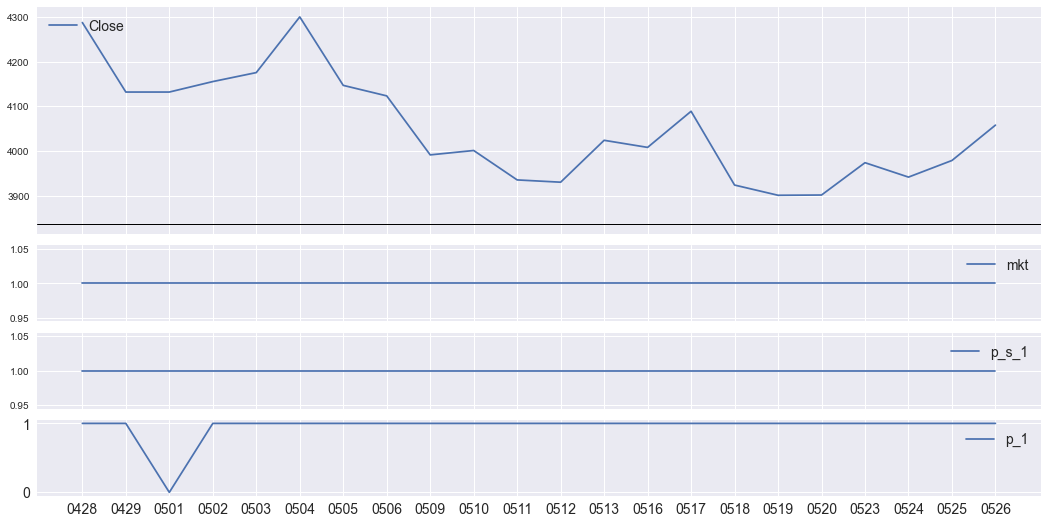

In [774]:
%run fmplot

s=dt.datetime(2022,4,28)
e=dt.datetime(2022,5,26)


fmplot(dfxyp,['Close','mkt','p_s_1','p_1'], plottypes =['line','line','line','line'], hlines=[3837,'','',''],
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right', 'upper right'],
      figsize=(18,9),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, height_ratios=(3,1,1,1))



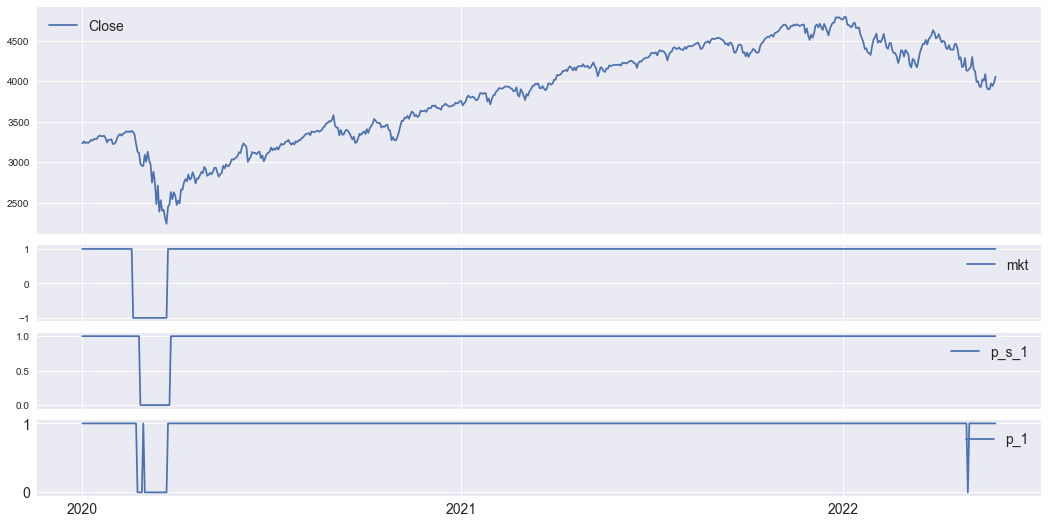

In [168]:
%run fmplot

s=dt.datetime(2020,1,1)
e=dt.datetime(2022,5,26)


fmplot(dfxyp,['Close','mkt','p_s_1','p_1'], plottypes =['line','line','line','line'], 
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right', 'upper right'],
      figsize=(18,9),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, height_ratios=(3,1,1,1))



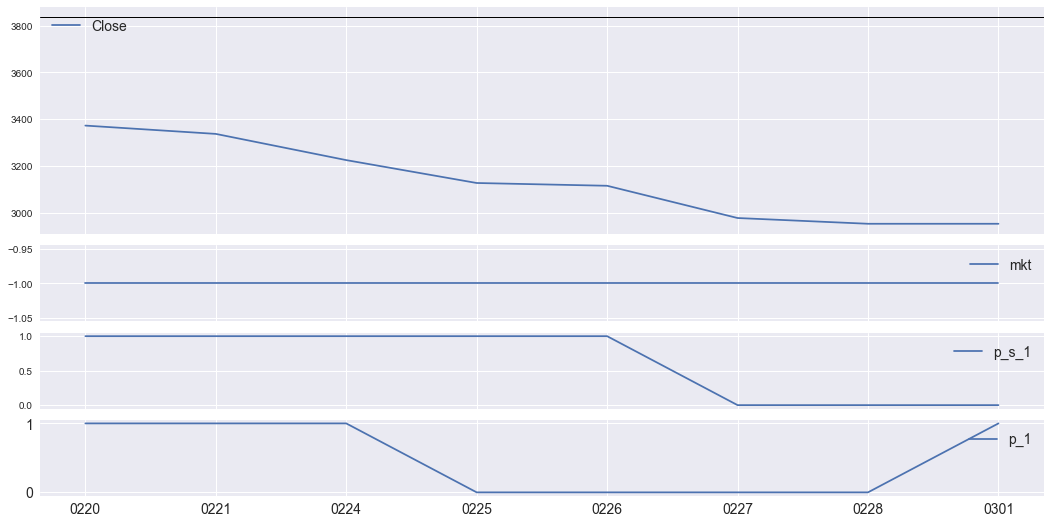

In [228]:
# 2020 Bear
%run fmplot

s=dt.datetime(2020,2,20)
e=dt.datetime(2020,3,1)


fmplot(dfxyp,['Close','mkt','p_s_1','p_1'], plottypes =['line','line','line','line'], hlines=[3837,'','',''],
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right', 'upper right'],
      figsize=(18,9),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, height_ratios=(3,1,1,1))




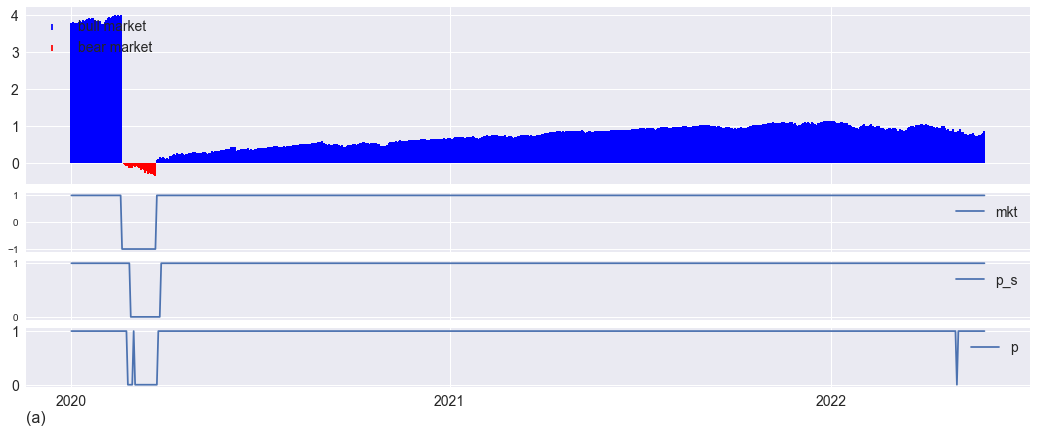

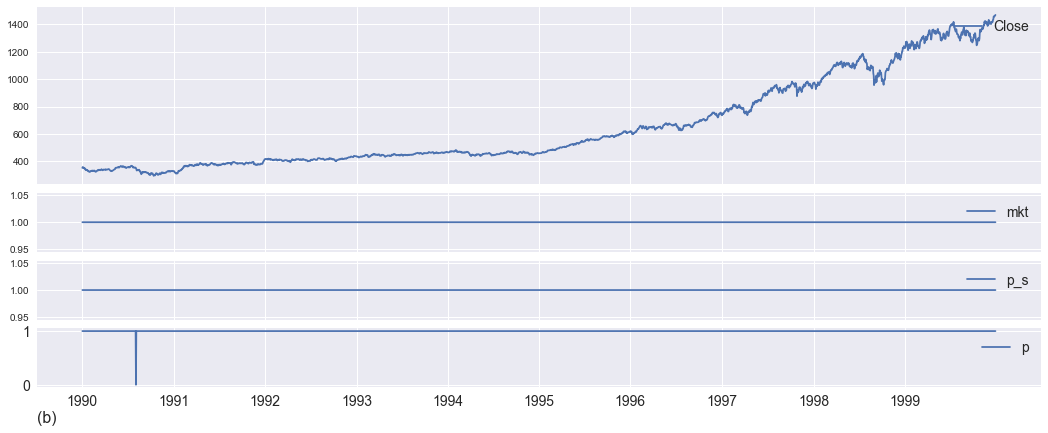

,Close,mkt,p_1,p_s_1
date,,,,
2020-02-18,3370.290039,1.0,1.0,1.0
2020-02-19,3386.149902,1.0,1.0,1.0
2020-02-20,3373.229980,-1.0,1.0,1.0
2020-02-21,3337.750000,-1.0,1.0,1.0
2020-02-24,3225.889893,-1.0,1.0,1.0
2020-02-25,3128.209961,-1.0,0.0,1.0
2020-02-26,3116.389893,-1.0,0.0,1.0
2020-02-27,2978.760010,-1.0,0.0,0.0


,Close,mkt,p_1,p_s_1
date,,,,
2020-03-18,2398.100098,-1.0,0.0,0.0
2020-03-19,2409.389893,-1.0,0.0,0.0
2020-03-20,2304.919922,-1.0,0.0,0.0
2020-03-23,2237.399902,-1.0,0.0,0.0
2020-03-24,2447.330078,1.0,1.0,0.0
2020-03-25,2475.560059,1.0,1.0,0.0
2020-03-26,2630.070068,1.0,1.0,1.0
2020-03-27,2541.469971,1.0,1.0,1.0


In [170]:
#startdate=dt.datetime(2008,10,1)
#enddate=dt.datetime(2009,2,1)

#s=dt.datetime(1957,1,1)
s=dt.datetime(2020,1,1)
e=dt.datetime(2022,5,27)

#startdate=dt.datetime(2019,1,1)
#enddate=dt.datetime(2020,8,11)

#startdate=dt.datetime(2000,1,1)
#enddate=dt.datetime(2001,12,31)

#s=dt.datetime(1957,1,1)
#e=dt.datetime(2020,11,4)
fmplot(dfxyp,['mcnr','mkt','p_s','p'], plottypes =['mktcycle','line','line','line'],
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right', 'upper right'],
       figsize=(18,7),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14,
       height_ratios=(3,1,1,1), xlabel = '(a)' , xlabelfontsize=16, xlabelloc=(0,-0.6))



s=dt.datetime(1990,1,1)
e=dt.datetime(1999,12,31)
fmplot(dfxyp,['Close','mkt','p_s','p'], startdate=s, enddate=e, sharex=True,
       llocs=['upper right', 'upper right','upper right', 'upper right'],
      figsize=(18,7),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, 
       height_ratios=(3,1,1,1), xlabel = '(b)' , xlabelfontsize=16,  xlabelloc=(0,-0.6))

display(dfxyp[['Close','mkt','p_1','p_s_1']][dt.datetime(2020,2,18):dt.datetime(2020,2,27)])
display(dfxyp[['Close','mkt','p_1','p_s_1']][dt.datetime(2020,3,18):dt.datetime(2020,3,27)])



# Save and Read

In [775]:
# save dataframe
today=dt.datetime.today()
nfeatures=dfTrain.shape[1]
save_model_df=True
PCAflag = False
if save_model_df==True:
    savedir='./data'
    v='v3'
    s=predict_s
    e=predict_e
    ps = '_ps'+ str(Nsmooth)
    if PCAflag == True: 
        filename='dfxyp'+'_'+model+'_'+v+'_'+'ndays'+str(nmodeltraindays)+'_nfeatures'+str(nfeatures)+ps+'_pca'+str(Npca)+'_'+str(s.year)+'-'+str(s.month)+'-'+str(s.day)
    else:
        filename='dfxyp'+'_'+model+'_'+v+'_'+'ndays'+str(nmodeltraindays)+'_nfeatures'+str(nfeatures)+ps+'_'+str(s.year)+'-'+str(s.month)+'-'+str(s.day)
    filename=savedir+'/'+filename+'_to_'+str(e.year)+'-'+str(e.month)+'-'+str(e.day)+'.csv'
    print('save filename:',filename)
    dfxyp[predict_s:predict_e].reset_index().to_csv(filename,index=False)
    
dfxyp.head()
    
# save file: ./data/dfxyp_XGB_v3_ndays1_nfeatures20_ps5_1957-1-2_to_2020-11-4.csv

save filename: ./data/dfxyp_XGB_v3_ndays1_nfeatures25_ps5_2020-1-3_to_2022-5-27.csv


,Close,Volume,High,Low,PE,Earnings,mkt,mcupm_n0,mucdown_n0,mdcup_n0,UMCSENT_n0,umcsent_pchange_n0,unrate_pchange_n0,recession1q_n0,PE_mom_n0,gdp_qoq_n0,Close_nma10_n4,Volume_nma10_n4,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_lrstd126_n99,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99,PE_n0,FEDFUNDSRATE_n0,UNRATE_n0,CPIAUCSL_n0,Week_n0,daysfrom_q_start_n0,daysto_q_end_n0,daysto_year_end_n0,y_1,p_1,model_date,p,p_s_1,p_s
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1955-01-01,35.980000,3840000.0,35.980000,35.980000,12.62,2.693344,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1955-01-03,36.750000,4570000.0,36.750000,36.750000,12.62,2.693344,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1955-01-04,36.419998,4420000.0,36.419998,36.419998,12.62,2.693344,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1955-01-05,35.520000,4640000.0,35.520000,35.520000,12.62,2.693344,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1955-01-06,35.040001,5300000.0,35.040001,35.040001,12.62,2.693344,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [173]:
# read dfxyp
#filename ='./data/dfxyp_XGB_v3_ndays1_nfeatures20_ps3_2000-1-3_to_2020-11-4.csv'
#filename ='./data/dfxyp_RF_v3_ndays1_nfeatures25_ps3_2000-1-3_to_2020-11-4.csv'
#filename ='./data/dfxyp_DT_v3_ndays1_nfeatures24_ps7_2000-1-3_to_2020-11-4.csv'
#filename ='./data/dfxyp_XGB_v3_ndays1_nfeatures20_ps3_1957-1-1_to_2020-11-4.csv'
filename: './data/dfxyp_XGB_v3_ndays1_nfeatures25_ps5_2020-1-3_to_2022-5-27.csv'
filename: './data/dfxyp_XGB_v3_ndays1_nfeatures25_ps5_1957-1-2_to_2022-5-27.csv'

read=False
if read==True:
    print(filename)
    dfxyp = pd.read_csv(filename,index_col=0,parse_dates=True)
    
    dfxyp.tail(3)    

    # Confusion Matrix "p"
    (accuracy,precision,recall,fscore,dfcma,dfcmr,tp,fp,tn,fn)=fmclfperformance(dfxyp,'y_1','p_1')

    display(dfxyp.head(3))
    display(dfxyp.tail(3))

In [776]:
# save model pickle 


save_model_pickle=True

if save_model_pickle==True:
    v='v4'
    nfeatures=dfTrain.shape[1]
    ps = '_ps'+ str(Nsmooth)
    if PCAflag == True:
        filename='pickle'+'_'+model+'_'+v+'_'+'ndays'+str(nmodeltraindays)+'_nfeatures'+str(nfeatures)+'_pca'+ps+str(Npca)+'_'+str(s.year)+'-'+str(s.month)+'-'+str(s.day)
        filename=savedir+'/'+filename+'_to_'+str(e.year)+'-'+str(e.month)+'-'+str(e.day)
    else:
        filename='pickle'+'_'+model+'_'+v+'_'+'ndays'+str(nmodeltraindays)+'_nfeatures'+str(nfeatures)+ps+'_'+str(s.year)+'-'+str(s.month)+'-'+str(s.day)
        filename=savedir+'/'+filename+'_to_'+str(e.year)+'-'+str(e.month)+'-'+str(e.day)
    with open(filename,'wb') as fout:
        pickle.dump(clf,fout)
    print('save filename:',filename)
   

save filename: ./data/pickle_XGB_v4_ndays1_nfeatures25_ps5_2020-1-3_to_2022-5-27


In [175]:
# Read pickle
read_model_pickle=False

filename: './data/pickle_XGB_v4_ndays1_nfeatures25_ps5_2020-1-3_to_2022-5-27'
filename: './data/pickle_XGB_v4_ndays1_nfeatures25_ps5_1957-1-2_to_2022-5-27'
#filename = './data/pickle_XGB_v3_ndays1_nfeatures20_1957-1-1_to_2020-11-4'
#filename = './data/pickle_XGB_v3_days5_nfeatures23_2000-1-3_to_2020-11-4'
if read_model_pickle==True:
    print(filename)
    with open(filename, 'rb') as fin:
        clf = pickle.load(fin)

# Feature Importance

In [779]:
# Bar Plot

def barplot(x, names, ax ,HorizontalBars=True):


    
    if HorizontalBars == True:  # horizontal looks good with many variable, 
        indices = list(np.argsort(x))
    else:                   # vertical for fewer variables
        # sort importances descending
        indices = list(np.argsort(x)[::-1])
        
    n = [ names[i] for i in indices]
    
    if HorizontalBars == True:
        
        print(names)
        print(x)
        
        ax.barh(n, x[indices], color = 'blue', align ='center')
        xticklabel_rotation = 0
    else:
        ax.bar(n, x[indices], color = 'blue')
        xticklabel_rotation = 60

    plt.xticks(rotation=xticklabel_rotation,fontsize=14)
    plt.yticks(fontsize=14)
    ax.grid(color='b', ls = '-.', lw = 0.25)
    ax.set_title("Feature Importance",fontsize=18)


    
    return

['FEDFUNDSRATE_n0', 'mcupm_n0', 'mucdown_n0', 'mdcup_n0', 'CPIAUCSL_n0', 'UMCSENT_n0', 'umcsent_pchange_n0', 'UNRATE_n0', 'unrate_pchange_n0', 'recession1q_n0', 'PE_n0', 'PE_mom_n0', 'gdp_qoq_n0', 'Week_n0', 'daysfrom_q_start_n0', 'daysto_q_end_n0', 'daysto_year_end_n0', 'Close_nma10_n4', 'Volume_nma10_n4', 'rma_sma20_sma50_n24', 'Close_lrstd63_n49', 'Close_lrstd126_n99', 'Close_nma200_n99', 'rma_sma50_sma200_n99', 'Volume_nma200_n99', 'y_1', 'p_1', 'xtrain_s', 'model_date']
[0.12716599 0.03461713 0.0811849  0.07029326 0.04869518 0.02030948
 0.12232543 0.04069874 0.01676938 0.00312791 0.00189921 0.00761686
 0.01501443 0.02762473 0.00541544 0.01449621 0.01153239 0.13147995
 0.04698391 0.07644843 0.06061629 0.00625864 0.01043969 0.00467096
 0.0143155 ]


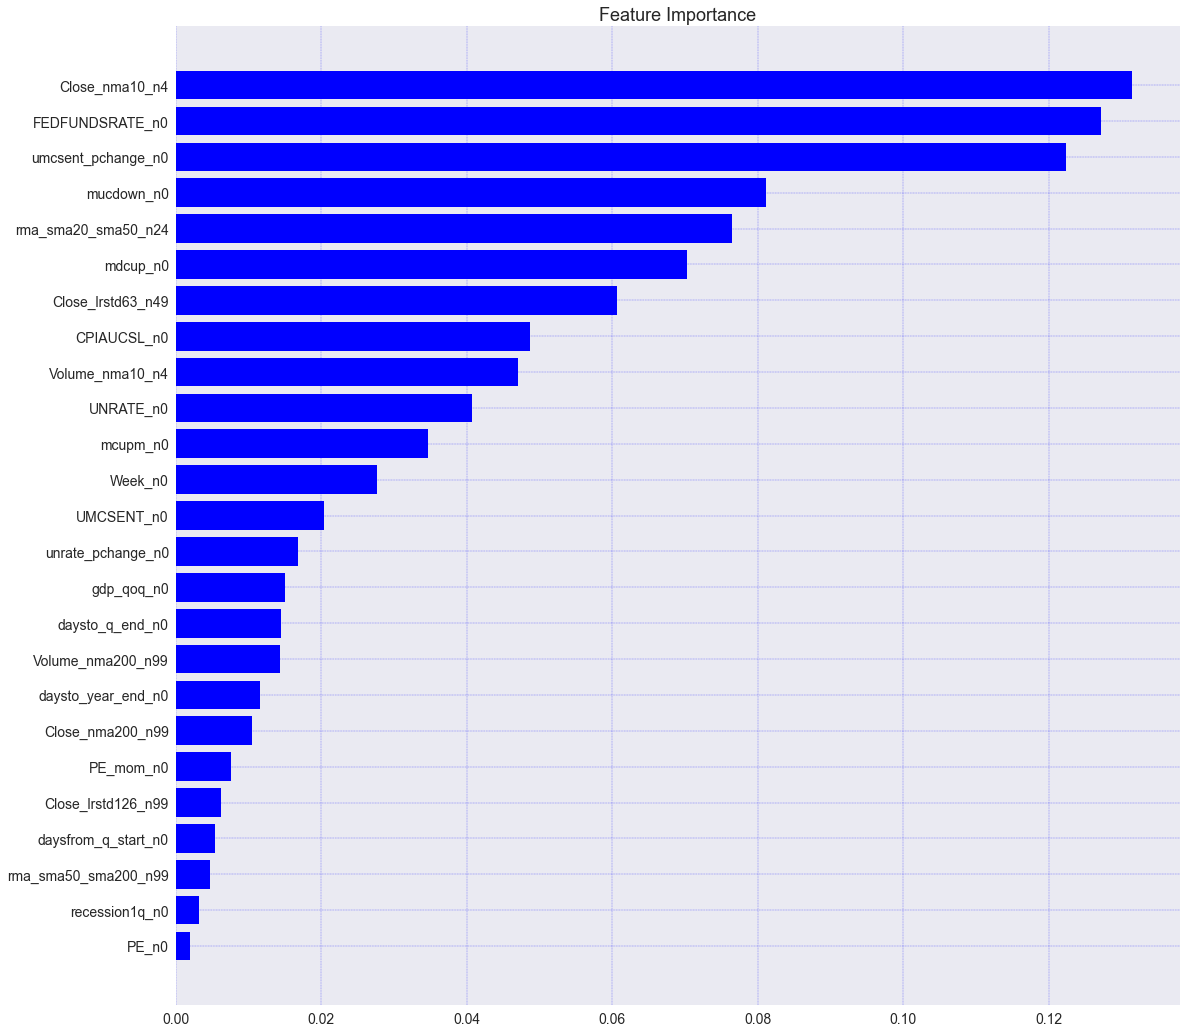

25
[0.04698391 0.13147995 0.01043969 0.01449621 0.02762473 0.07644843
 0.0143155  0.00541544 0.00467096 0.01153239 0.01501443 0.06061629
 0.01676938 0.00625864 0.0811849  0.00761686 0.04869518 0.12232543
 0.00189921 0.02030948 0.04069874 0.07029326 0.12716599 0.00312791
 0.03461713]
['FEDFUNDSRATE_n0', 'mcupm_n0', 'mucdown_n0', 'mdcup_n0', 'CPIAUCSL_n0', 'UMCSENT_n0', 'umcsent_pchange_n0', 'UNRATE_n0', 'unrate_pchange_n0', 'recession1q_n0', 'PE_n0', 'PE_mom_n0', 'gdp_qoq_n0', 'Week_n0', 'daysfrom_q_start_n0', 'daysto_q_end_n0', 'daysto_year_end_n0', 'Close_nma10_n4', 'Volume_nma10_n4', 'rma_sma20_sma50_n24', 'Close_lrstd63_n49', 'Close_lrstd126_n99', 'Close_nma200_n99', 'rma_sma50_sma200_n99', 'Volume_nma200_n99', 'y_1', 'p_1', 'xtrain_s', 'model_date']


In [780]:
importances=clf.feature_importances_

HorizontalBars=True   

# rearange feature names so they match the sorted features
feature_names=dfTrain.columns



# Plot the Bar Plot
figsize=[18,18]
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=figsize)
barplot(importances,names, ax)
plt.show()

# Print Importances
print(len(importances))
print(importances[indices])
print(names)


# Explainability

To get an idea of the variables driving the market change look at the variables at
* market high 
* market sell
* market low
* market buy

Observe the difference at these discrete times

In [810]:
# COVID Prediction Explainabiity

# Standardized Variables from dfTR
# market cycle hslb (high, sell, low, buy )
mcycle_hslb_dates=[dt.datetime(2020,2,19),
                   dt.datetime(2020,2,27), 
                   dt.datetime(2020,3,23), 
                   dt.datetime(2020,3,26)]

# data frame with hclb standardized variables
df_hslb_n = dfxyp.loc[mcycle_hslb_dates].copy().reset_index()

print('df_hslb - high sell low buy - normalized variables')
display(df_hslb_n.head())

df_hslb_n_T = df_hslb_n.drop(['Close','Volume','High','Low','PE','Earnings','model_date','mkt','y_1','p_1','p','p_s_1','p_s'],axis=1)
df_hslb_n_T = df_hslb_n_T.melt(id_vars='date')
#df_explain['date']=df_explain['date'].dt.strftime("%Y-%m-%d")

print('df_hslb - high sell low buy - normalized variables, transpose')
display(df_hslb_n_T.head(10))

print('dfX_hslb - raw non-normalized features')

dfX_hslb = dfX_features.loc[mcycle_hslb_dates].copy()
dfX_hslb.head()

df_hslb - high sell low buy - normalized variables


,date,Close,Volume,High,Low,PE,Earnings,mkt,mcupm_n0,mucdown_n0,mdcup_n0,umcsent_pchange_n0,unrate_pchange_n0,recession1q_n0,Close_lrstd126_n99,PE_n0,PE_mom_n0,FEDFUNDSRATE_n0,UNRATE_n0,CPIAUCSL_n0,UMCSENT_n0,Week_n0,daysfrom_q_start_n0,daysto_q_end_n0,daysto_year_end_n0,gdp_qoq_n0,Close_nma10_n4,Volume_nma10_n4,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99,y_1,p_1,model_date,p,p_s_1,p_s
0,2020-02-19,3386.149902,3.600150e+09,3393.520020,3378.830078,24.27,132.901525,1.0,1.0,0.000000,0.000000,0.012024,-0.027778,1.0,0.008419,0.080315,0.886953,0.817579,0.008850,0.149478,0.299092,0.484883,0.134615,0.538462,0.450549,0.865753,0.687276,0.044614,0.764838,0.087951,0.673077,0.716148,0.082992,0.0,1.0,2020-02-18,1.0,1.0,1.0
1,2020-02-27,2978.760010,7.058840e+09,3097.070068,2977.389893,24.27,132.901525,-1.0,1.0,0.120311,0.000000,0.012024,-0.027778,1.0,0.008802,0.080315,0.886953,0.817579,0.008850,0.149478,0.299092,0.484883,0.153846,0.626374,0.362637,0.843836,0.630406,0.042939,0.767606,0.089505,0.685031,0.693774,0.057183,0.0,0.0,2020-02-26,0.0,0.0,0.0
2,2020-03-23,2237.399902,7.402180e+09,2300.729980,2191.860107,22.23,132.893386,-1.0,0.0,0.000000,0.000000,-0.117822,0.257143,1.0,0.008764,0.031496,0.882765,0.620232,0.088496,0.132034,0.247000,0.484883,0.230769,0.901099,0.087912,0.775342,0.369779,0.055333,0.728071,0.045711,0.679485,0.694100,0.082020,1.0,0.0,2020-03-20,0.0,0.0,0.0
3,2020-03-26,2630.070068,7.753160e+09,2637.010010,2500.719971,22.23,132.893386,1.0,0.0,0.000000,0.175503,-0.117822,0.257143,1.0,0.008446,0.031496,0.882765,0.620232,0.088496,0.132034,0.247000,0.484883,0.230769,0.934066,0.054945,0.767123,0.221979,0.056000,0.719356,0.045349,0.679680,0.697927,0.079168,1.0,1.0,2020-03-25,1.0,0.0,0.0


df_hslb - high sell low buy - normalized variables, transpose


,date,variable,value
0,2020-02-19,mcupm_n0,1.000000
1,2020-02-27,mcupm_n0,1.000000
2,2020-03-23,mcupm_n0,0.000000
3,2020-03-26,mcupm_n0,0.000000
4,2020-02-19,mucdown_n0,0.000000
5,2020-02-27,mucdown_n0,0.120311
6,2020-03-23,mucdown_n0,0.000000
7,2020-03-26,mucdown_n0,0.000000
8,2020-02-19,mdcup_n0,0.000000
9,2020-02-27,mdcup_n0,0.000000


dfX_hslb - raw non-normalized features


,FEDFUNDSRATE_n0,mcupm_n0,mucdown_n0,mdcup_n0,CPIAUCSL_n0,UMCSENT_n0,umcsent_pchange_n0,UNRATE_n0,unrate_pchange_n0,recession1q_n0,PE_n0,PE_mom_n0,gdp_qoq_n0,Week_n0,daysfrom_q_start_n0,daysto_q_end_n0,daysto_year_end_n0,Close_nma10_n4,Volume_nma10_n4,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_lrstd126_n99,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-19,1.58,1.0,0.000000,0.000000,259.050,101.0,0.012024,3.5,-0.027778,1.0,24.27,0.002478,-0.007731,8,49,41,316,0.002918,0.008203,0.022402,0.006037,0.008419,0.000764,0.038020,0.014413
2020-02-27,1.58,1.0,0.120311,0.000000,259.050,101.0,0.012024,3.5,-0.027778,1.0,24.27,0.002478,-0.007731,9,57,33,308,-0.000226,0.003521,0.023023,0.006104,0.008802,0.000834,0.028978,0.010695
2020-03-23,0.65,0.0,0.000000,0.000000,257.953,89.1,-0.117822,4.4,0.257143,1.0,22.23,-0.084054,-0.007731,13,82,8,283,-0.014634,0.038154,0.014152,0.004204,0.008764,0.000802,0.029110,0.014273
2020-03-26,0.65,0.0,0.000000,0.175503,257.953,89.1,-0.117822,4.4,0.257143,1.0,22.23,-0.084054,-0.007731,13,85,5,280,-0.022805,0.040018,0.012196,0.004188,0.008446,0.000803,0.030656,0.013862


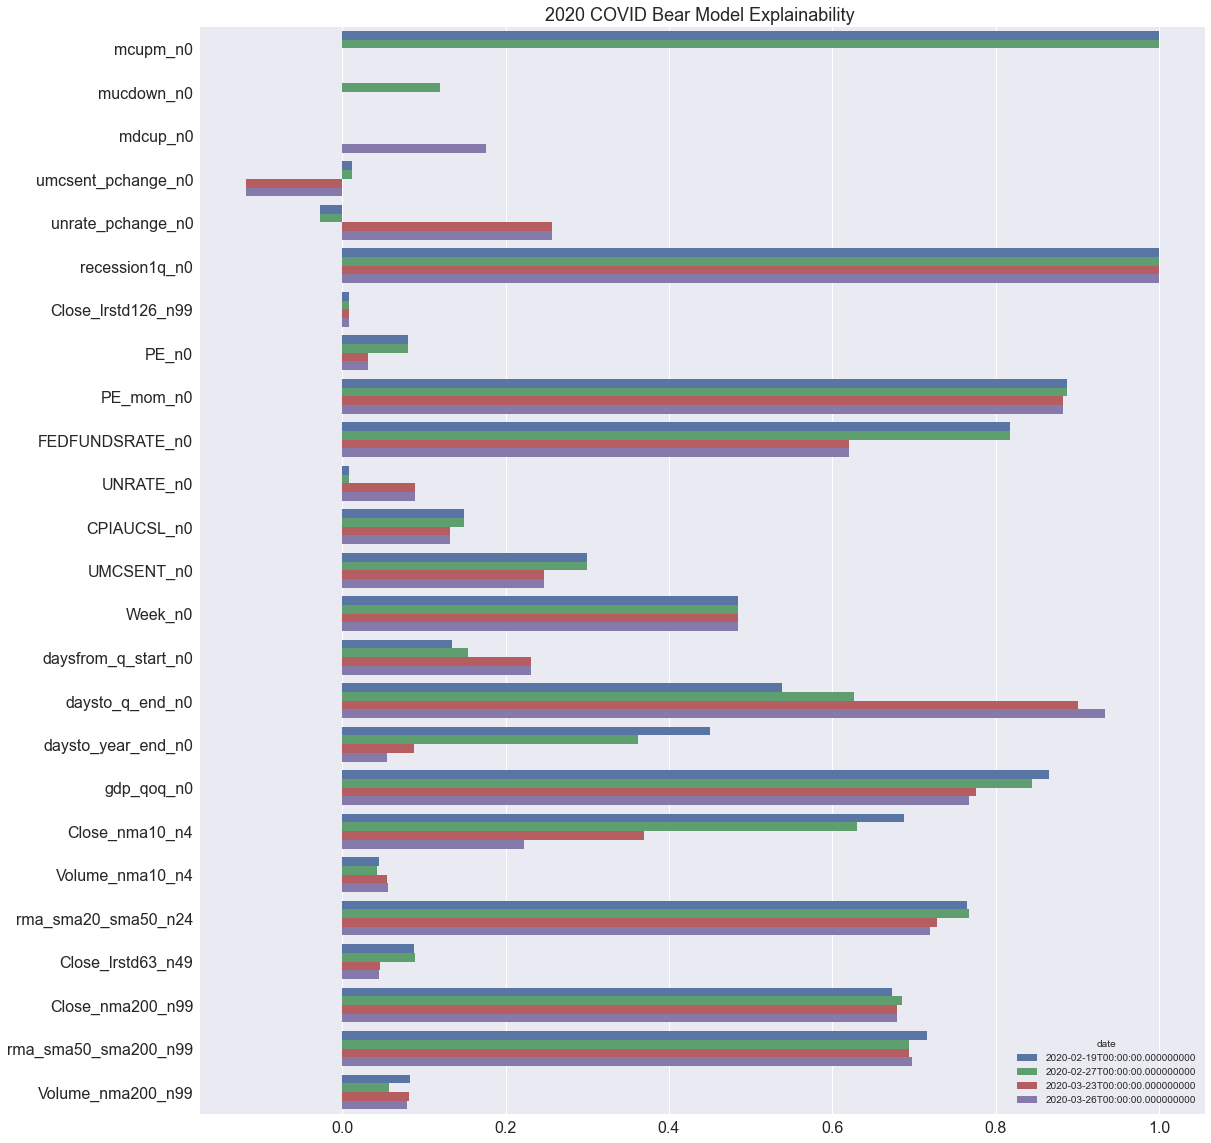

In [808]:
%run plot_helper_functions # download these from github

plt.style.use('seaborn')
nrows, ncols, figsize = 1, 1, [18,20]
fig,ax_n = plt.subplots(nrows=nrows,ncols=ncols,figsize=figsize)


plot_options=get_plot_defaults()
plot_options.update({'title':'2020 COVID Bear Model Explainability '})
plot_options.update({'xtickrotation':0})

# color = [51/235,125/235,183/235]
g=sns.barplot(x="value", y="variable" , hue='date', data=df_hslb_s_T, ax = ax_n)


set_axisparams(plot_options,ax_n) 

# Anticipation and Reaction Time: Market Bottom and Market Re-entry

In [602]:
dfa = dfxyp[['Close','mkt','p_1','p_s','p_s_1']].copy()
dfa['mkt_1'] = dfa['mkt'].shift(-1)

# ps = 0,1  down market, up market
# mkt = -1, 1  down market, up market
# keep days where mkt -1 -> 1, mkt 1 > -1, ps  0 -> 1 , ps 1 -> 0


def market_anticipation_variables(row):
    row['ps_10'] = 1 if row['p_s'] == 1 and row['p_s_1'] == 0 else 0
    row['ps_01'] = 1 if row['p_s'] == 0 and row['p_s_1'] == 1 else 0
    row['mkt_01'] = 1 if row['mkt'] == -1 and row['mkt_1'] == 1 else 0
    row['mkt_10'] = 1 if row['mkt'] == 1 and row['mkt_1'] == -1 else 0
    row['keep'] = True if row['ps_10'] == 1 or row['ps_01'] == 1 or row['mkt_01'] == 1 or row['mkt_10'] == 1 else False

    return row

# market bottom and rentry variables
print('...\n')
dfa = dfa.apply(lambda row: market_anticipation_variables(row), axis=1)                                             
dfa = dfa[dfa['keep']==True]
dfa = dfa.drop('keep',axis=1)

# order the columns for convenience ... 1960 market start for convenience starts on up markdet
dfa = dfa[['Close','mkt','mkt_1','mkt_10','mkt_01','p_s','p_s_1','ps_10','ps_01']]
t1=dt.datetime(1960,1,1)
dfa=dfa.loc[t1:]

display(dfa)

# Consolidate Hith to Low to High Market ... 4 rows into 1
# rows come in groups of 4 ... 
#  1 mkt turns from Bull to Bear
#  2 ps (smooth) prediction turns from Bull to Bear
#  3 mket turns from Bear to Bull
#  4 ps (smooth) prediction turns fro Bear to BUll

dfa2 = dfa.copy()
dfa2 = dfa.reset_index()
dfa2['Date_Mkt_High']=dfa2['date'] # market high at close of business
dfa2['Date_Sell']=dfa2['date'].shift(-1)   # sell signal close of bus prediction for next day ... out of market by next morn
dfa2['Date_Mkt_Low']=dfa2['date'].shift(-2) # market low at close of business
dfa2['Date_Buy']=dfa2['date'].shift(-3)  # buy signal forward predict for next day, buy by morning

dfa2['Mkt_High_Price'] = dfa2['Close']
dfa2['Sell_Price'] = dfa2['Close'].shift(-1)
dfa2['Mkt_Low_Price'] = dfa2['Close'].shift(-2)
dfa2['Buy_Price'] = dfa2['Close'].shift(-3)

dfa2 = dfa2[(dfa2['mkt']==1 ) &(dfa2['mkt_1']==-1)]




# sell at the end of day
# buy at the end of day, at market open
cols=['Date_Mkt_High', 'Date_Sell','Date_Mkt_Low','Date_Buy','Mkt_High_Price','Sell_Price','Mkt_Low_Price','Buy_Price']
dfa2=dfa2[cols]

display(dfa2)



# Market Low Anticipation and low to high Reaction
def market_low_anticipation(row,df):
    
    Anticipation_Low=df.loc[row['Date_Sell']:row['Date_Mkt_Low']].index.size
    
    return Anticipation_Low

def market_lowhigh_reaction(row,df):
    
    Reaction_LowHigh=df.loc[row['Date_Mkt_Low']:row['Date_Buy']].index.size
    
    return Reaction_LowHigh

dfa3 = dfa2.copy()

dfa3['Anticipation_Low'] = dfa3.apply(lambda row: market_low_anticipation(row,dfxyp), axis=1 )
dfa3['Reaction_LowHigh'] = dfa3.apply(lambda row: market_lowhigh_reaction(row,dfxyp), axis=1 )

dfa3=dfa3.reset_index(drop=True)

dfa3

...



,Close,mkt,mkt_1,mkt_10,mkt_01,p_s,p_s_1,ps_10,ps_01
date,,,,,,,,,
1961-12-12,72.639999,1.0,-1.0,1.0,0.0,1.0,1.0,0.0,0.0
1961-12-15,72.010002,-1.0,-1.0,0.0,0.0,1.0,0.0,1.0,0.0
1962-06-26,52.320000,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1962-06-29,54.750000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1966-02-09,94.059998,1.0,-1.0,1.0,0.0,1.0,1.0,0.0,0.0
1966-02-16,93.160004,-1.0,-1.0,0.0,0.0,1.0,0.0,1.0,0.0
1966-10-07,73.199997,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1966-10-13,76.889999,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1968-12-01,108.370003,1.0,-1.0,1.0,0.0,1.0,1.0,0.0,0.0


,Date_Mkt_High,Date_Sell,Date_Mkt_Low,Date_Buy,Mkt_High_Price,Sell_Price,Mkt_Low_Price,Buy_Price
0,1961-12-12,1961-12-15,1962-06-26,1962-06-29,72.639999,72.010002,52.320000,54.750000
4,1966-02-09,1966-02-16,1966-10-07,1966-10-13,94.059998,93.160004,73.199997,76.889999
8,1968-12-01,1968-12-05,1970-05-26,1970-05-29,108.370003,107.669998,69.290001,76.550003
12,1973-01-11,1973-01-17,1974-10-03,1974-10-08,120.239998,118.680000,62.279999,64.839996
16,1980-11-28,1980-12-05,1982-08-12,1982-08-19,140.520004,134.029999,102.419998,109.160004
20,1987-08-25,1987-08-31,1987-12-04,1987-12-09,336.769989,329.799988,223.919998,238.889999
24,2000-03-24,2000-03-30,2001-09-21,2001-09-27,1527.459961,1487.920044,965.799988,1018.609985
28,2002-01-04,2002-01-10,2002-07-23,2002-07-26,1172.510010,1156.550049,797.700012,852.840027
32,2007-10-09,2007-10-17,2008-11-20,2008-11-25,1565.150024,1541.239990,752.440002,857.390015
36,2009-01-06,2009-01-12,2009-03-09,2009-03-13,934.700012,870.260010,676.530029,756.549988


,Date_Mkt_High,Date_Sell,Date_Mkt_Low,Date_Buy,Mkt_High_Price,Sell_Price,Mkt_Low_Price,Buy_Price,Anticipation_Low,Reaction_LowHigh
0,1961-12-12,1961-12-15,1962-06-26,1962-06-29,72.639999,72.010002,52.320000,54.750000,135,4
1,1966-02-09,1966-02-16,1966-10-07,1966-10-13,94.059998,93.160004,73.199997,76.889999,165,5
2,1968-12-01,1968-12-05,1970-05-26,1970-05-29,108.370003,107.669998,69.290001,76.550003,376,4
3,1973-01-11,1973-01-17,1974-10-03,1974-10-08,120.239998,118.680000,62.279999,64.839996,440,4
4,1980-11-28,1980-12-05,1982-08-12,1982-08-19,140.520004,134.029999,102.419998,109.160004,434,6
5,1987-08-25,1987-08-31,1987-12-04,1987-12-09,336.769989,329.799988,223.919998,238.889999,69,4
6,2000-03-24,2000-03-30,2001-09-21,2001-09-27,1527.459961,1487.920044,965.799988,1018.609985,379,5
7,2002-01-04,2002-01-10,2002-07-23,2002-07-26,1172.510010,1156.550049,797.700012,852.840027,135,4
8,2007-10-09,2007-10-17,2008-11-20,2008-11-25,1565.150024,1541.239990,752.440002,857.390015,284,4
9,2009-01-06,2009-01-12,2009-03-09,2009-03-13,934.700012,870.260010,676.530029,756.549988,41,5


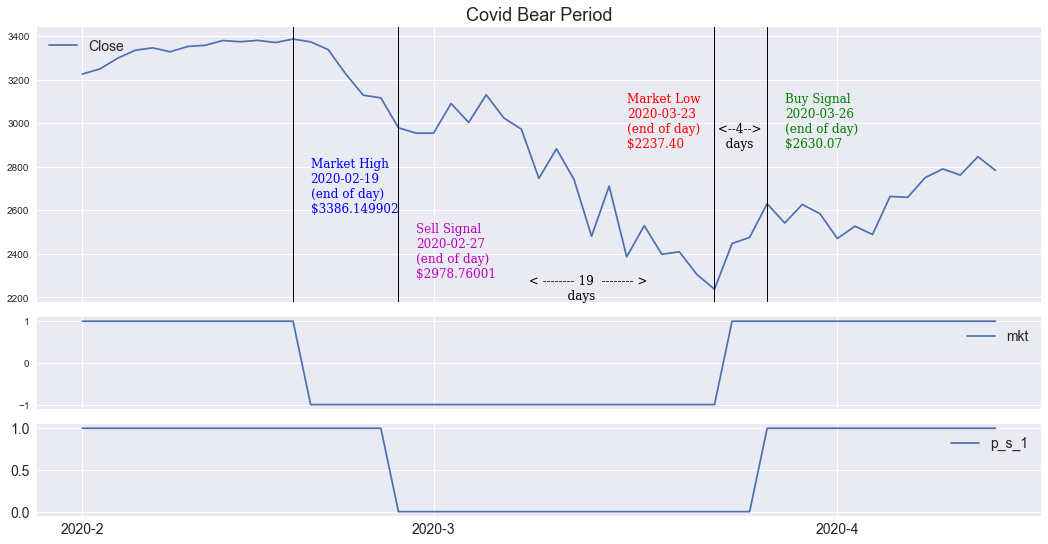

In [711]:
# 2020 COVID BEAR

## select the market cycle high date
dmcycle = dt.datetime(2020,2,19)
df_mcycle = dfa3[dfa3['Date_Mkt_High']==dmcycle]

### the rest is automatic
d1=df_mcycle['Date_Mkt_High'].values[0]
d1=pd.to_datetime(d1)
d1.strftime("%Y-%m-%d")
p1=df_mcycle['Mkt_High_Price'].values[0]

d2=df_mcycle['Date_Sell'].values[0]
d2=pd.to_datetime(d2)
d2.strftime("%Y-%m-%d")
p2=df_mcycle['Sell_Price'].values[0]


d3=df_mcycle['Date_Mkt_Low'].values[0]
d3=pd.to_datetime(d3)
d3.strftime("%Y-%m-%d")
p3=df_mcycle['Mkt_Low_Price'].values[0]

d4=df_mcycle['Date_Buy'].values[0]
d4=pd.to_datetime(d4)
d4.strftime("%Y-%m-%d")
p4=df_mcycle['Buy_Price'].values[0]

anticipation=df_mcycle['Anticipation_Low'].values[0]
reaction=df_mcycle['Reaction_LowHigh'].values[0]


vlines=[(d1,d2,d3,d4),'','','']

covid_bear_annotations = [ [(dt.datetime(2020,2,20),2600,f'Market High\n{d1.strftime("%Y-%m-%d")}\n(end of day)\n${p1}','b',12) , 
                            (dt.datetime(2020,2,28),2300,f'Sell Signal\n{d2.strftime("%Y-%m-%d")}\n(end of day)\n${p2}','m',12),
                            (dt.datetime(2020,3,15),2900,f'Market Low\n{d3.strftime("%Y-%m-%d")}\n(end of day)\n${p3:.2f}','r',12),
                            (dt.datetime(2020,3,27),2900,f'Buy Signal\n{d4.strftime("%Y-%m-%d")}\n(end of day)\n${p4:.2f}','g',12), 
                            (dt.datetime(2020,3,6),2200,f'  < -------- {anticipation}  -------- >\n            days','k',12),
                            (dt.datetime(2020,3,23),2900,f' <--{reaction}-->\n   days','k',12),
                            ] 
                            ,'','',''  ]
#covid_bear_annotations = ['' ,'','','']

#annotations = covid_bear_annotations,
#covid_bear_annotations=(dt.datetime(1951,1,1),2.8,'1953-54\nPost\nKorean\nWar\nRecession','k')

fmplot(dfxyp,['Close','mkt','p_s_1'], plottypes =['line','line','line'],
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right'],
       titles = ['Covid Bear Period','',''], title_fontsize=18,
       figsize=(18,9),ytick_labelsize=14, xtick_labelsize=14, 
       vlines = vlines, annotations = covid_bear_annotations,
       legend_fontsize=14, height_ratios=(3,1,1))




In [245]:

s = dt.datetime(2022,4,27)
e = dt.datetime(2022,4,28)
mkt_4_28=dfxyp.loc[s:e]['Close'].max()
print(f'  S&P April 28 = {mkt_4_28}')


  S&P April 28 = 4287.5


# Backtest

#### Backtest Dataframes from 1960 to 2022-5-27

In [585]:
dfxyp.tail()

,Close,Volume,High,Low,PE,Earnings,mcnr,mcupm,mdcup,mucdown,mkt,p,y_1,p_1,model_date,p_s_1,p_s
date,,,,,,,,,,,,,,,,,
2022-05-23,3973.750000,3.392770e+09,3981.879883,3909.040039,23.16,196.28065,0.776057,1.0,0.0,0.171542,1.0,1.0,1.0,1.0,2022-05-20,1.0,1.0
2022-05-24,3941.479980,3.901640e+09,3955.679932,3875.129883,23.16,196.28065,0.761634,1.0,0.0,0.178269,1.0,1.0,1.0,1.0,2022-05-23,1.0,1.0
2022-05-25,3978.729980,4.322190e+09,3999.330078,3925.030029,23.16,196.28065,0.778283,1.0,0.0,0.170503,1.0,1.0,1.0,1.0,2022-05-24,1.0,1.0
2022-05-26,4057.840088,3.961940e+09,4075.139893,3984.600098,23.16,196.28065,0.813641,1.0,0.0,0.154010,1.0,1.0,1.0,1.0,2022-05-25,1.0,1.0
2022-05-27,4158.240234,3.560560e+09,4158.490234,4077.429932,23.16,196.28065,0.858515,1.0,0.0,0.133079,1.0,1.0,NaN,1.0,2022-05-26,1.0,1.0


In [575]:
se=(dt.datetime(1960,1,1),dt.datetime(2022,5,27))
price_variable = 'Close'
dftsummary,dfbt=fmbacktest(dfxyp[se[0]:se[1]].copy(),price_variable,'p')
dftsummary

,start_date,end_date,start_price,end_price,start_strategyvalue,end_strategyvalue,r,r_strategy
1960,1960-01-01,1961-01-01,59.889999,58.110001,59.889999,57.230475,-0.029721,-0.044407
1961,1961-01-01,1962-01-01,58.110001,71.550003,57.230475,71.432219,0.231286,0.248150
1962,1962-01-01,1962-12-31,71.550003,63.099998,71.432219,87.638041,-0.118099,0.226870
1963,1963-01-01,1963-12-31,63.099998,75.019997,87.638041,103.896466,0.188906,0.185518
1964,1964-01-01,1964-12-31,75.019997,84.750000,103.896466,117.371712,0.129699,0.129699
1965,1965-01-01,1965-12-31,84.750000,92.430000,117.371712,128.007874,0.090619,0.090619
1966,1966-01-01,1967-01-01,92.430000,80.330002,128.007874,139.034110,-0.130910,0.086137
1967,1967-01-01,1968-01-01,80.330002,96.470001,139.034110,166.969008,0.200921,0.200921
1968,1968-01-01,1968-12-31,96.470001,103.860001,166.969008,188.462402,0.076604,0.128727
1969,1969-01-01,1969-12-31,103.860001,92.059998,188.462402,188.462402,-0.113615,0.000000


**BACKTEST 2020**

In [596]:
%run fmml
price_variable='Close'
se=(dt.datetime(2020,1,1),dt.datetime(2022,5,27))
dftsummary_2020_2022,dfbt_2020_2022=fmbacktest(dfxyp[se[0]:se[1]].copy(),price_variable,'p_s')
display(dfbt_2020_2022.head())
display(dftsummary_2020_2022.tail())
dftsummary_2020_2022.T

,Close,Volume,High,Low,PE,Earnings,mcnr,mcupm,mdcup,mucdown,mkt,p,y_1,p_1,model_date,p_s_1,p_s,Close_R,Close_strategyvalue
date,,,,,,,,,,,,,,,,,,,
2020-01-01,3230.780029,2.893810e+09,3231.719971,3212.030029,24.21,133.448163,3.775516,1.0,0.0,0.002852,1.0,1.0,1.0,1.0,2019-12-31,1.0,1.0,0.000000,3230.780029
2020-01-02,3257.850098,3.458250e+09,3258.139893,3235.530029,24.21,133.448163,3.815529,1.0,0.0,0.000000,1.0,1.0,1.0,1.0,2020-01-01,1.0,1.0,0.008379,3257.850098
2020-01-03,3234.850098,3.461290e+09,3246.149902,3222.340088,24.21,133.448163,3.781532,1.0,0.0,0.007060,1.0,1.0,1.0,1.0,2020-01-02,1.0,1.0,-0.007060,3234.850098
2020-01-06,3246.280029,3.674070e+09,3246.840088,3214.639893,24.21,133.448163,3.798427,1.0,0.0,0.003551,1.0,1.0,1.0,1.0,2020-01-03,1.0,1.0,0.003533,3246.280029
2020-01-07,3237.179932,3.420380e+09,3244.909912,3232.429932,24.21,133.448163,3.784976,1.0,0.0,0.006345,1.0,1.0,1.0,1.0,2020-01-06,1.0,1.0,-0.002803,3237.179932


,start_date,end_date,start_price,end_price,start_strategyvalue,end_strategyvalue,r,r_strategy
2020,2020-01-01,2020-12-31,3230.780029,3756.070068,3230.780029,4254.043058,0.162589,0.316723
2021,2021-01-01,2021-12-31,3756.070068,4766.180176,4254.043058,5398.071740,0.268927,0.268927
2022,2022-01-01,2022-05-27,4766.180176,4158.240234,5398.071740,4709.532218,-0.127553,-0.127553


,2020,2021,2022
start_date,2020-01-01 00:00:00,2021-01-01 00:00:00,2022-01-01 00:00:00
end_date,2020-12-31 00:00:00,2021-12-31 00:00:00,2022-05-27 00:00:00
start_price,3230.78,3756.07,4766.18
end_price,3756.07,4766.18,4158.24
start_strategyvalue,3230.78,4254.04,5398.07
end_strategyvalue,4254.04,5398.07,4709.53
r,0.162589,0.268927,-0.127553
r_strategy,0.316723,0.268927,-0.127553


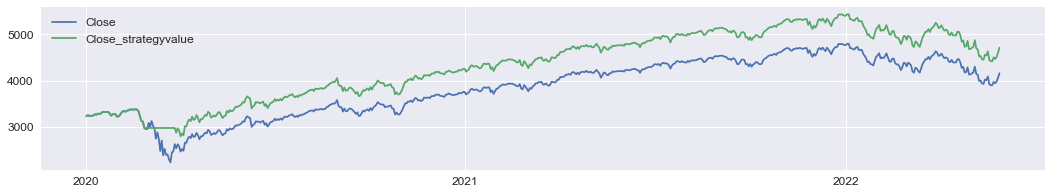

In [597]:
%run fmplot


s=dt.datetime(2020,1,1)
e=dt.datetime(2022,12,31)
variables=['Close','Close_strategyvalue']


fmplot(dfbt_2020_2022, figsize=(18,3), variables= [variables],
       startdate=s, enddate=e,  xlabelfontsize=16)

**BACKTEST 2000 - 2022**

In [590]:
se=(dt.datetime(2000,1,1),dt.datetime(2022,5,20))
dftsummary_2000_2022,dfbt_2000_2022=fmbacktest(dfxyp[se[0]:se[1]].copy(),price_variable,'p')
dftsummary_2000_2022

,start_date,end_date,start_price,end_price,start_strategyvalue,end_strategyvalue,r,r_strategy
2000,2000-01-01,2001-01-01,1469.250000,1320.280029,1469.250000,1485.179535,-0.101392,0.010842
2001,2001-01-01,2001-12-31,1320.280029,1148.079956,1485.179535,1637.456249,-0.130427,0.102531
2002,2002-01-01,2002-12-31,1148.079956,879.820007,1637.456249,1779.522727,-0.233660,0.086760
2003,2003-01-01,2003-12-31,879.820007,1111.920044,1779.522727,2248.967940,0.263804,0.263804
2004,2004-01-01,2004-12-31,1111.920044,1211.920044,2248.967940,2451.227802,0.089935,0.089935
2005,2005-01-01,2006-01-01,1211.920044,1248.290039,2451.227802,2524.789703,0.030010,0.030010
2006,2006-01-01,2007-01-01,1248.290039,1418.300049,2524.789703,2868.651714,0.136194,0.136194
2007,2007-01-01,2007-12-31,1418.300049,1468.359985,2868.651714,3036.644940,0.035296,0.058562
2008,2008-01-01,2008-12-31,1468.359985,903.250000,3036.644940,3439.526270,-0.384858,0.132673
2009,2009-01-01,2009-12-31,903.250000,1115.099976,3439.526270,5355.067217,0.234542,0.556920


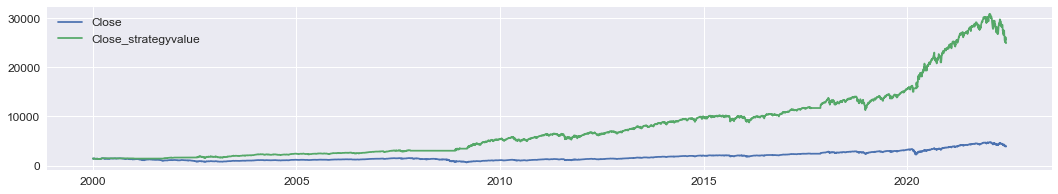

In [591]:
%run fmplot


s=dt.datetime(2000,1,1)
e=dt.datetime(2022,12,31)
variables=['Close','Close_strategyvalue']


fmplot(dfbt_2000_2022, figsize=(18,3), variables= [variables],
       startdate=s, enddate=e,  xlabelfontsize=16)

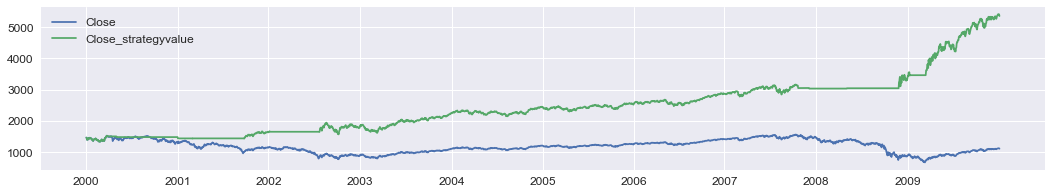

In [592]:
s=dt.datetime(2000,1,1)
e=dt.datetime(2009,12,31)
fmplot(dfbt_2000_2022, figsize=(18,3), variables= [variables],
       startdate=s, enddate=e,  xlabelfontsize=16)

In [318]:
se=(dt.datetime(1990,1,1),dt.datetime(1999,12,31))
dftsummary,dfbt=fmbacktest(dfxyp[se[0]:se[1]].copy(),price_variable,'p_s')
dftsummary

,start_date,end_date,start_price,end_price,start_strategyvalue,end_strategyvalue,r,r_strategy
1990,1990-01-01,1990-12-31,353.399994,330.220001,353.399994,340.111905,-0.065591,-0.037601
1991,1991-01-01,1991-12-31,330.220001,417.089996,340.111905,429.584133,0.263067,0.263067
1992,1992-01-01,1992-12-31,417.089996,435.709991,429.584133,448.761899,0.044643,0.044643
1993,1993-01-01,1993-12-31,435.709991,466.450012,448.761899,480.422753,0.070552,0.070552
1994,1994-01-01,1995-01-01,466.450012,459.269989,480.422753,473.027649,-0.015393,-0.015393
1995,1995-01-01,1996-01-01,459.269989,615.929993,473.027649,634.380481,0.341107,0.341107
1996,1996-01-01,1996-12-31,615.929993,740.739990,634.380481,762.929223,0.202637,0.202637
1997,1997-01-01,1997-12-31,740.739990,970.429993,762.929223,999.499704,0.310082,0.310082
1998,1998-01-01,1998-12-31,970.429993,1229.229980,999.499704,1266.052173,0.266686,0.266686
1999,1999-01-01,1999-12-31,1229.229980,1469.250000,1266.052173,1513.262111,0.195260,0.195260
